In [1]:
# Created 21Mar23
# To create df of schools system sizes for heatmaps of S1-S4 with mean emissions intensity
# Second part of this code is for plotting
# See Jupyter notebook: 'emi_schools_S1-S4'
# check outputs with excel: 'S0-S4 analysis and check'
# previous version of this code: 'trial_heatmap.py'


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Move to path where csv are saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"
path

cwd = os.getcwd()
cwd

os.chdir(path)
cwd    # pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs/Plots modelling PJua'

In [2]:
# SCENARIO 1 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s1 = pd.read_csv("Optim_res_unmet_0_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s1 = s1[s1.Institution != 'Clinic']

# to check there are 148 schools
schools_s1["Site_name"].count()  # returns 148

148

In [3]:
schools_s1["Emissions_intensity"].describe().round(2)  
# to know emi values (all schools)

count     148.00
mean      379.77
std       154.84
min       194.90
25%       286.83
50%       334.93
75%       424.70
max      1582.41
Name: Emissions_intensity, dtype: float64

In [4]:
# Emissions intensity
# Groups schools by Initial storage and PV size and calculates average emi in that bin
emi_schools_s1 = schools_s1.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_schools_s1 = emi_schools_s1.to_frame()
emi_schools_s1.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
1.0                  0.265                         398.02
                     0.530                         513.90
                     0.795                         622.85
2.0                  0.265                         426.88
                     0.530                         336.00
                     0.795                         355.19
                     1.060                         307.27
                     1.325                         342.30
                     1.590                         508.90
                     2.385                         517.15
3.0                  0.265                         459.26
                     0.530                         369.13
                     0.795                         385.32
                     1.060                         291.40
                     1.325                         398.60
                     1.590                         438.68
4.0                  0.530                         375.48
                     0.795                         395.34
                     1.060                         317.89
                     1.325                         347.14
                     1.590                         243.71
5.0                  0.530                         240.60
                     0.795                         381.88
                     1.060                         313.86
                     1.325                         318.79
                     1.855                         434.03
                     2.120                         317.17
6.0                  0.795                         489.91
                     1.060                         381.78
                     1.590                         405.46
                     1.855                         248.44
                     2.120                         571.37
                     2.385                         258.18
                     2.915                         441.65
7.0                  0.530                         300.76
                     1.060                         416.41
                     1.590                         243.06
                     1.855                         424.23
8.0                  1.855                         219.14
                     2.915                         795.40
9.0                  1.855                         417.96
                     2.120                         334.56
                     2.385                         528.14
                     3.445                         270.26
10.0                 2.120                         224.78
11.0                 1.855                         546.70
14.0                 2.385                        1582.41
                     3.180                         237.95

In [5]:
# to know schools min and max average emi values (vmin & vmax)
emi_schools_s1["Emissions_intensity"].describe().round(3)
                    # returns: min= 219.135 (vmin), max= 1582.407 (vmax)
                    # returns count != than 148 because some sites have same size

count      48.000
mean      410.319
std       207.500
min       219.135
25%       312.214
50%       381.830
75%       439.419
max      1582.407
Name: Emissions_intensity, dtype: float64

In [6]:
# Pivot df to be able to do heatmap
emi_schools_s1_hp = emi_schools_s1.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")
emi_schools_s1_hp.round(2) # to show in Jupyter

Initial_PV_size        0.265   0.530   0.795   1.060   1.325   1.590   1.855  \
Initial_storage_size                                                           
1.0                   398.02  513.90  622.85     NaN     NaN     NaN     NaN   
2.0                   426.88  336.00  355.19  307.27  342.30  508.90     NaN   
3.0                   459.26  369.13  385.32  291.40  398.60  438.68     NaN   
4.0                      NaN  375.48  395.34  317.89  347.14  243.71     NaN   
5.0                      NaN  240.60  381.88  313.86  318.79     NaN  434.03   
6.0                      NaN     NaN  489.91  381.78     NaN  405.46  248.44   
7.0                      NaN  300.76     NaN  416.41     NaN  243.06  424.23   
8.0                      NaN     NaN     NaN     NaN     NaN     NaN  219.14   
9.0                      NaN     NaN     NaN     NaN     NaN     NaN  417.96   
10.0                     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11.0                     NaN     NaN     NaN     NaN     NaN     NaN  546.70   
14.0                     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Initial_PV_size        2.120    2.385   2.915   3.180   3.445  
Initial_storage_size                                           
1.0                      NaN      NaN     NaN     NaN     NaN  
2.0                      NaN   517.15     NaN     NaN     NaN  
3.0                      NaN      NaN     NaN     NaN     NaN  
4.0                      NaN      NaN     NaN     NaN     NaN  
5.0                   317.17      NaN     NaN     NaN     NaN  
6.0                   571.37   258.18  441.65     NaN     NaN  
7.0                      NaN      NaN     NaN     NaN     NaN  
8.0                      NaN      NaN  795.40     NaN     NaN  
9.0                   334.56   528.14     NaN     NaN  270.26  
10.0                  224.78      NaN     NaN     NaN     NaN  
11.0                     NaN      NaN     NaN     NaN     NaN  
14.0                     NaN  1582.41     NaN  237.95     NaN

In [7]:
# Setting style for plotting
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")
#sns.set_context("paper")  # poster

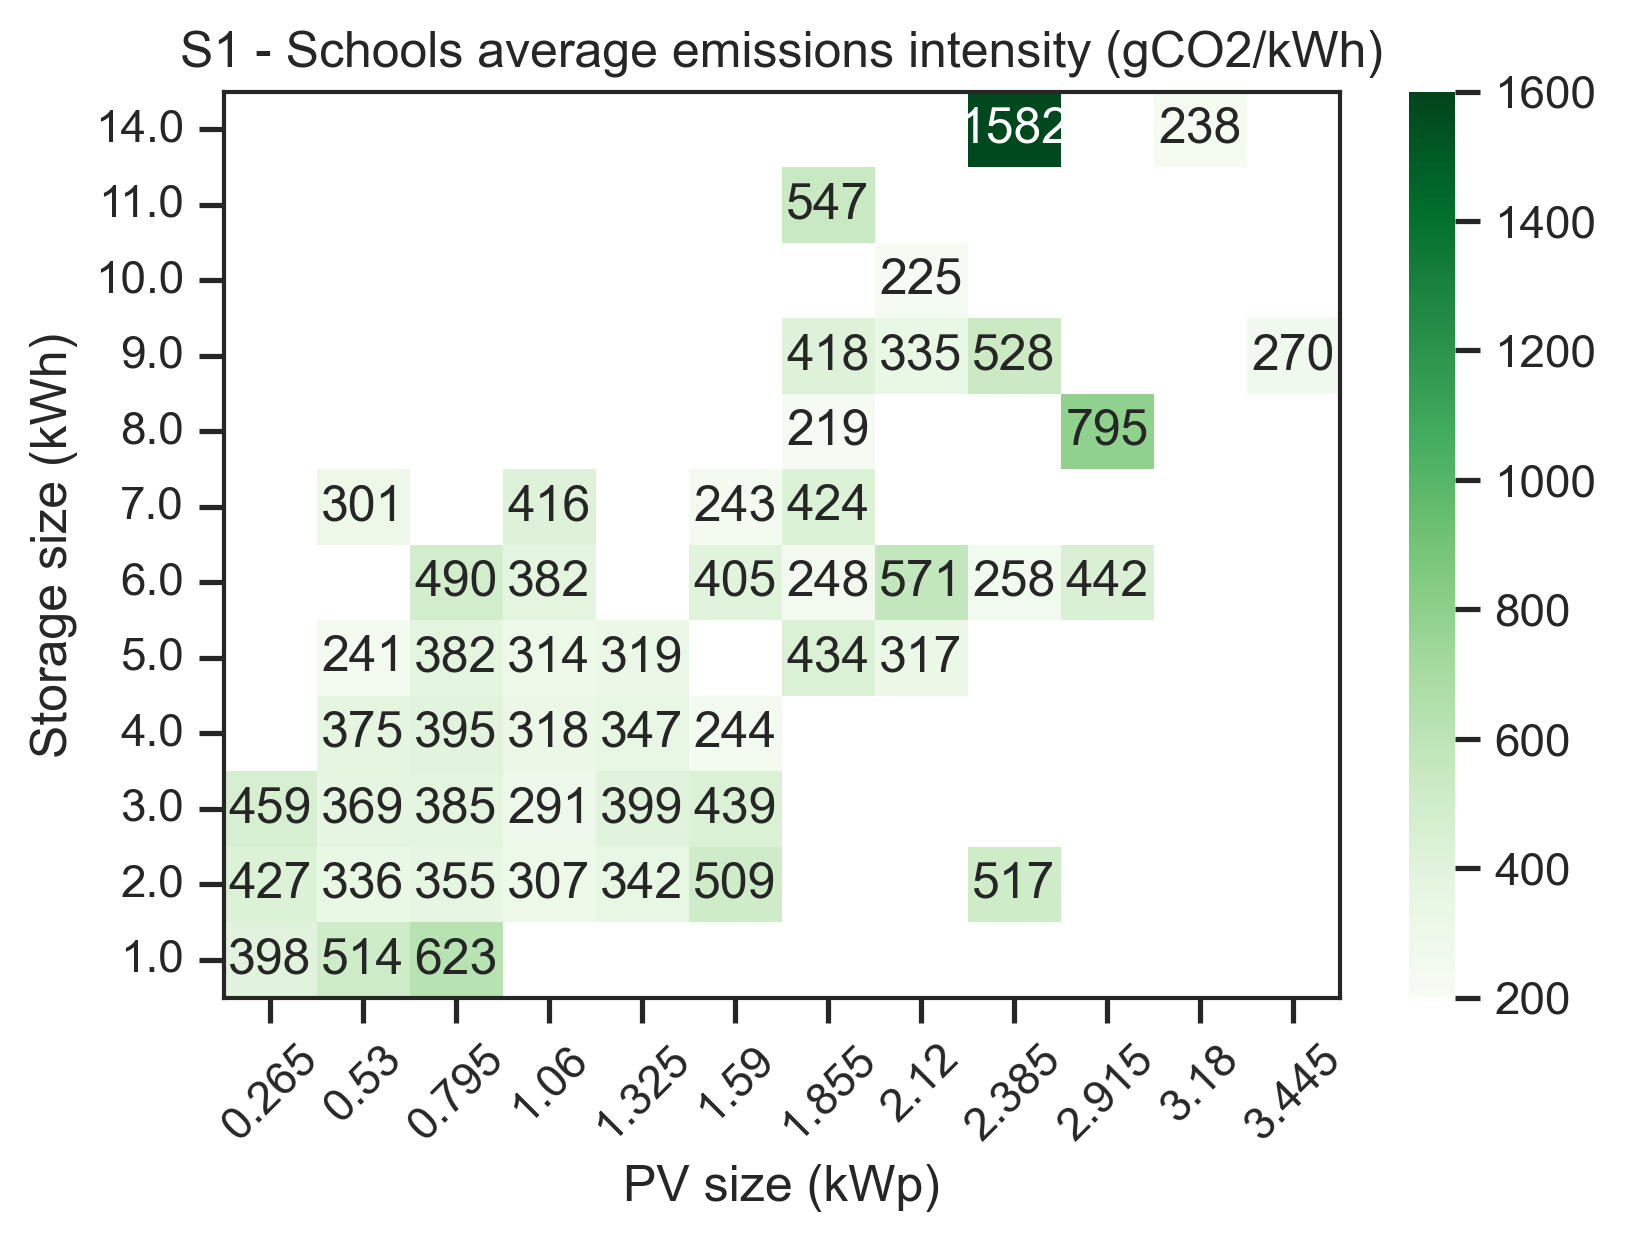

In [8]:
# S1 SCHOOL emi PLOT (to plot data as it is - delete vmin and vmax for raw plot)
ax = sns.heatmap(emi_schools_s1_hp, vmin=200, vmax=1600, cmap="Greens", annot=True, fmt=".0f")
ax.invert_yaxis()
ax.set_title("S1 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

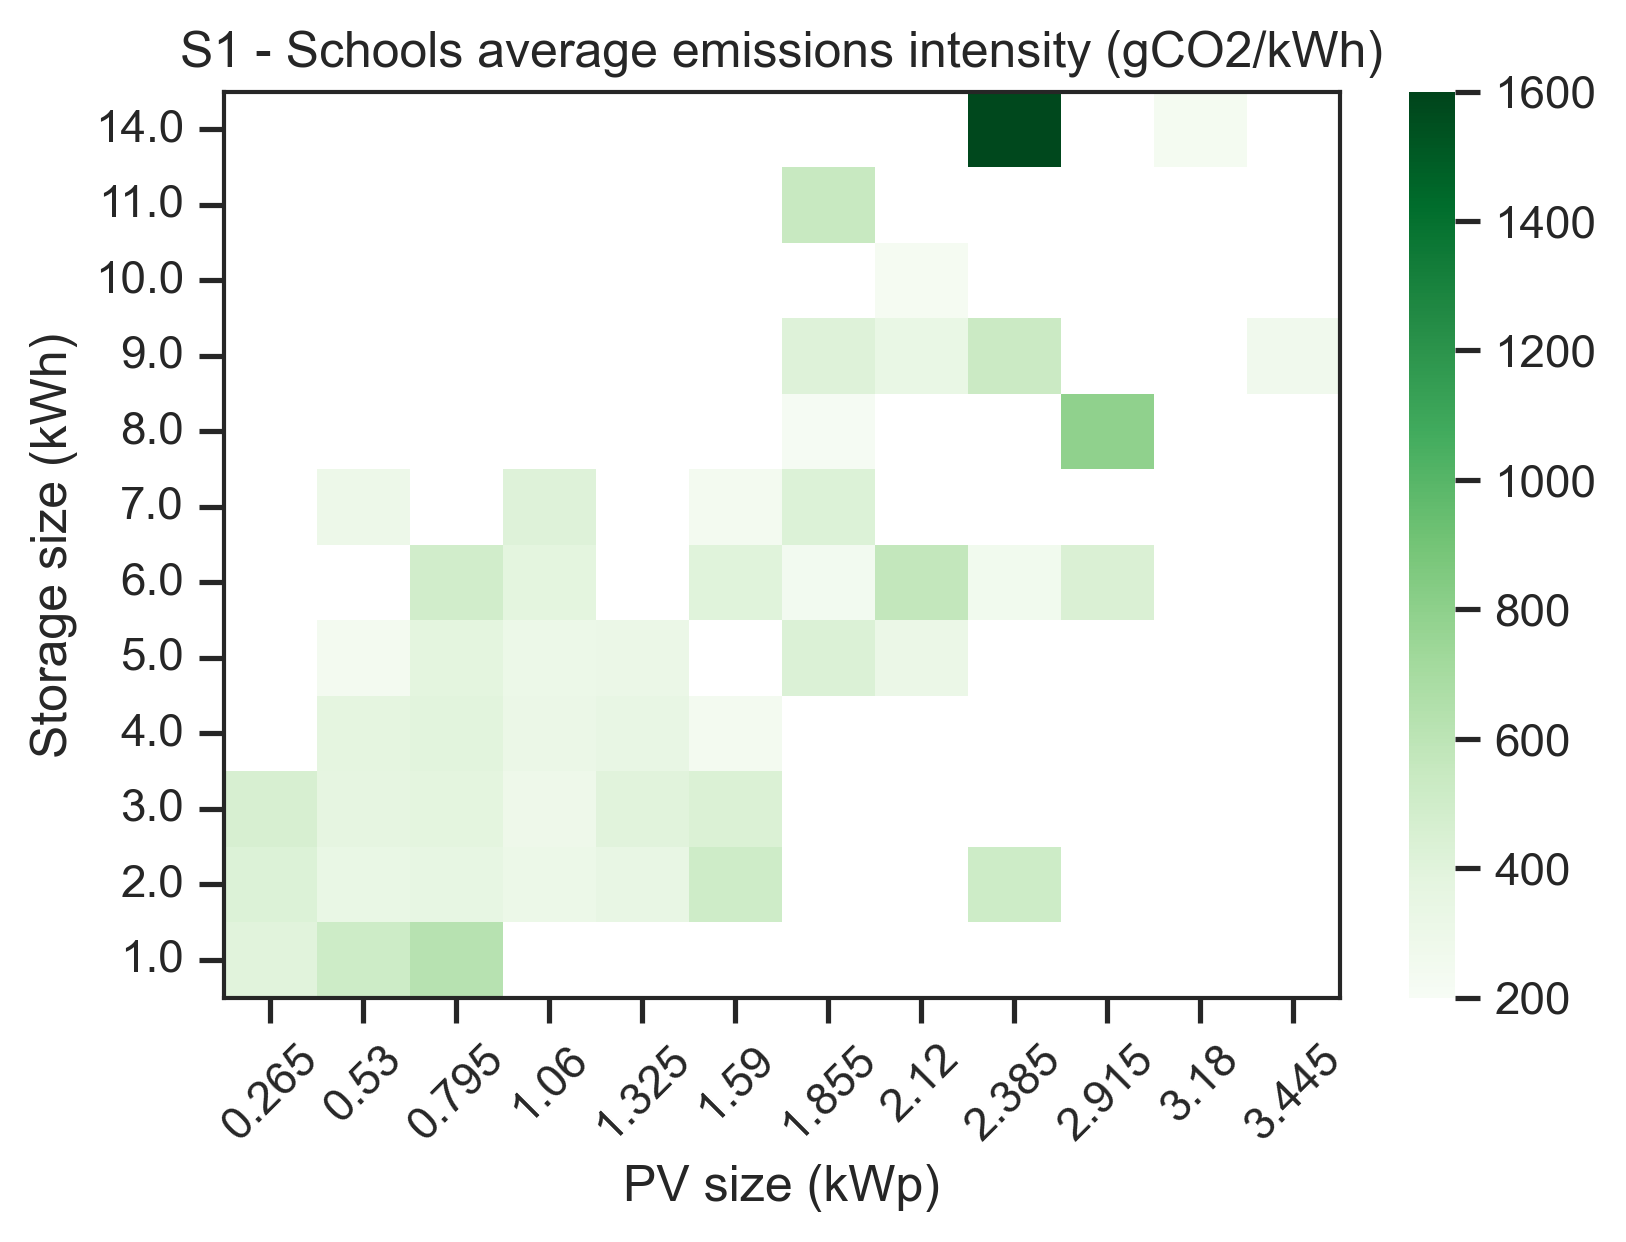

In [9]:
# S1 SCHOOL emi PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(emi_schools_s1_hp, vmin=200, vmax=1600, cmap="Greens")
ax.invert_yaxis()
ax.set_title("S1 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

In [10]:
# SCENARIO 2 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s2 = pd.read_csv("Optim_res_unmet_0.01_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s2 = s2[s2.Institution != 'Clinic']
# to check there are 148 schools
schools_s2["Site_name"].count()  # returns 148

148

In [11]:
schools_s2["Emissions_intensity"].describe().round(2)  
# to know emi values (all schools)

count     148.00
mean      309.34
std       142.11
min       165.94
25%       228.99
50%       281.31
75%       348.48
max      1512.61
Name: Emissions_intensity, dtype: float64

In [12]:
# Emissions intensity
# Groups schools by Initial storage and PV size and calculates average emi in that bin
emi_schools_s2 = schools_s2.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_schools_s2 = emi_schools_s2.to_frame()
emi_schools_s2.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
1.0                  0.265                         392.25
                     0.530                         396.79
                     0.795                         315.24
2.0                  0.265                         266.61
                     0.530                         280.17
                     0.795                         309.92
                     1.060                         346.80
                     1.325                         319.94
3.0                  0.530                         342.26
                     0.795                         266.81
                     1.060                         254.71
                     1.325                         212.56
4.0                  0.795                         216.99
                     1.060                         353.16
                     1.325                         265.51
                     1.855                         295.72
5.0                  0.530                         262.14
                     1.060                         316.26
                     1.325                         284.17
                     1.590                         277.18
                     1.855                         324.40
6.0                  1.060                         195.39
                     1.325                         234.01
                     1.590                         332.69
7.0                  1.590                         213.44
8.0                  1.590                         177.16
                     1.855                         172.85
9.0                  1.590                         479.48
11.0                 2.385                        1512.61
12.0                 2.120                         177.94

In [13]:
# to know schools min and max average emi values (vmin & vmax)
emi_schools_s2["Emissions_intensity"].describe().round(3)
                    # returns: min= 172.850 (vmin), max= 1512.607 (vmax)
                    # returns count != than 148 because some sites have same size

count      30.000
mean      326.504
std       234.921
min       172.850
25%       239.185
50%       282.168
75%       330.619
max      1512.607
Name: Emissions_intensity, dtype: float64

In [14]:
# Pivot df to be able to do heatmap
emi_schools_s2_hp = emi_schools_s2.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")
emi_schools_s2_hp.round(2) # to show in Jupyter

Initial_PV_size        0.265   0.530   0.795   1.060   1.325   1.590   1.855  \
Initial_storage_size                                                           
1.0                   392.25  396.79  315.24     NaN     NaN     NaN     NaN   
2.0                   266.61  280.17  309.92  346.80  319.94     NaN     NaN   
3.0                      NaN  342.26  266.81  254.71  212.56     NaN     NaN   
4.0                      NaN     NaN  216.99  353.16  265.51     NaN  295.72   
5.0                      NaN  262.14     NaN  316.26  284.17  277.18  324.40   
6.0                      NaN     NaN     NaN  195.39  234.01  332.69     NaN   
7.0                      NaN     NaN     NaN     NaN     NaN  213.44     NaN   
8.0                      NaN     NaN     NaN     NaN     NaN  177.16  172.85   
9.0                      NaN     NaN     NaN     NaN     NaN  479.48     NaN   
11.0                     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12.0                     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Initial_PV_size        2.120    2.385  
Initial_storage_size                   
1.0                      NaN      NaN  
2.0                      NaN      NaN  
3.0                      NaN      NaN  
4.0                      NaN      NaN  
5.0                      NaN      NaN  
6.0                      NaN      NaN  
7.0                      NaN      NaN  
8.0                      NaN      NaN  
9.0                      NaN      NaN  
11.0                     NaN  1512.61  
12.0                  177.94      NaN

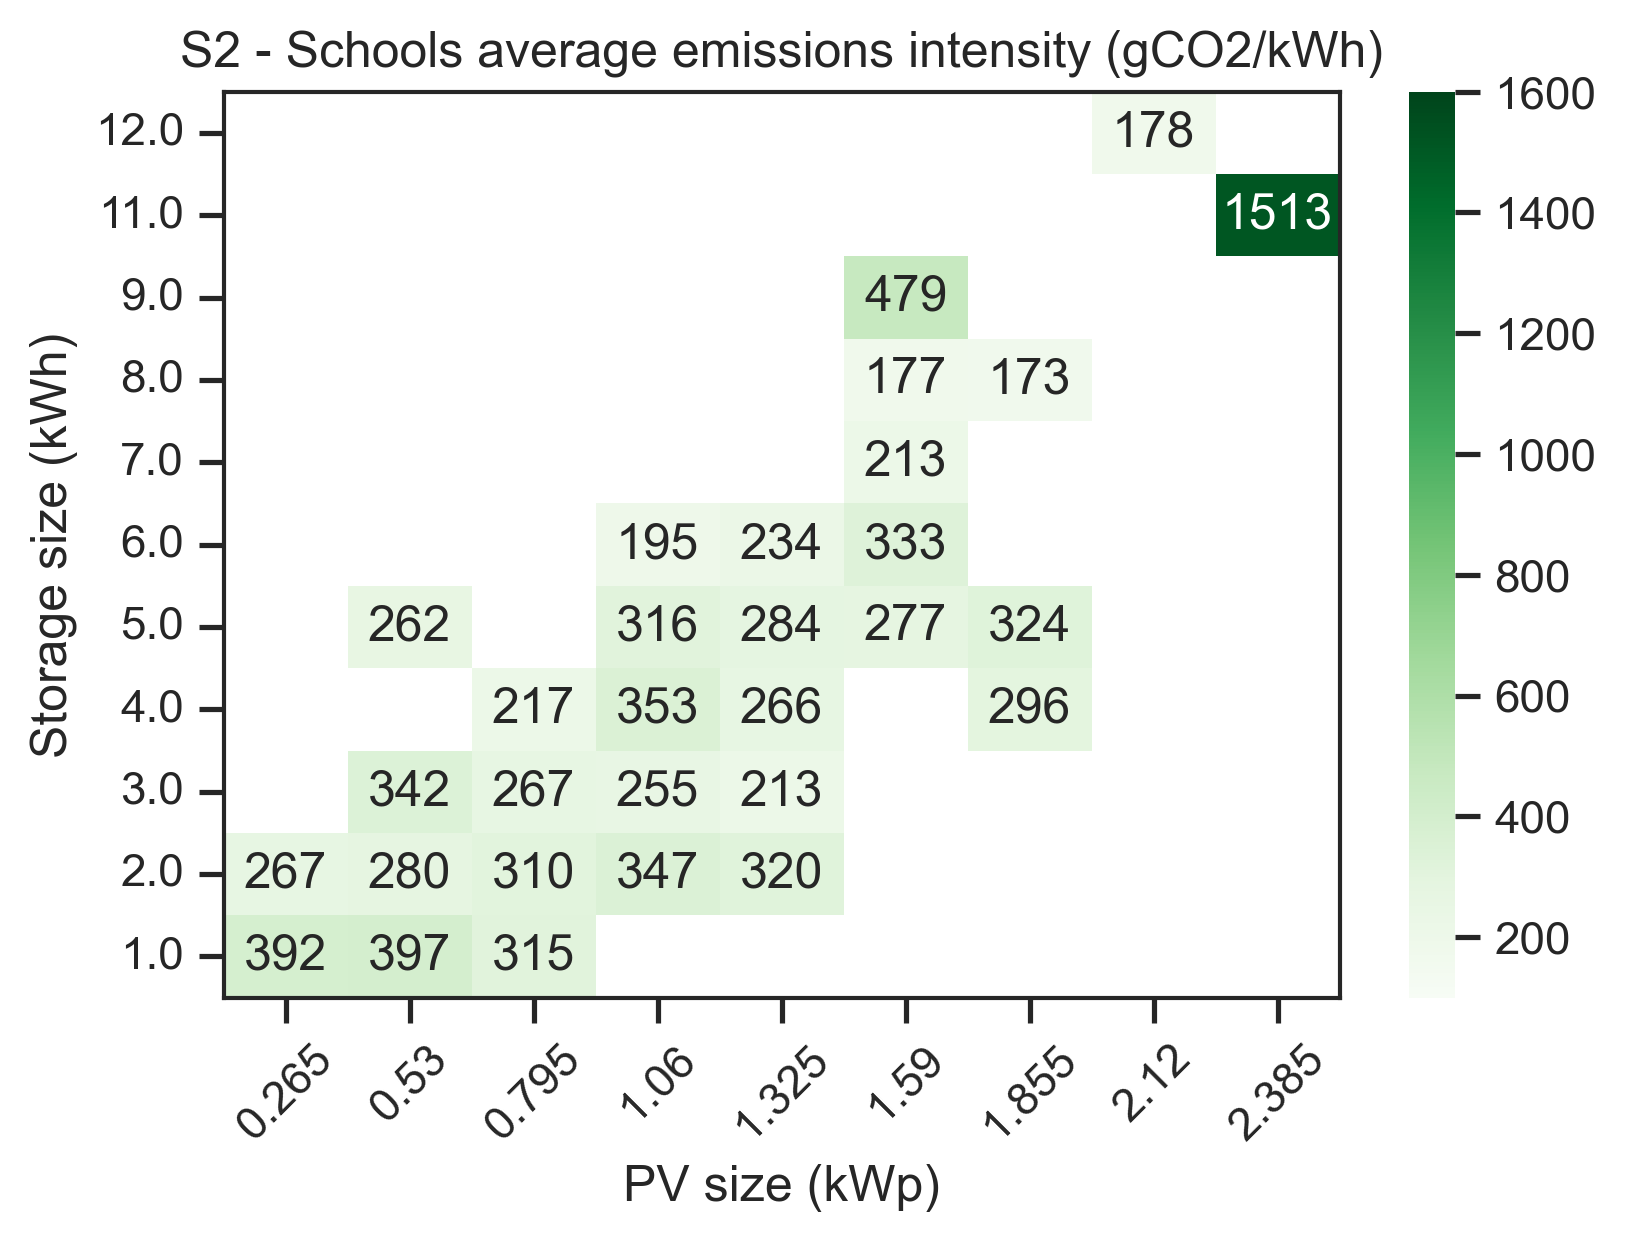

In [15]:
# S2 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(emi_schools_s2_hp, vmin=100, vmax=1600, cmap="Greens", annot=True, fmt=".0f")
ax.invert_yaxis()
ax.set_title("S2 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

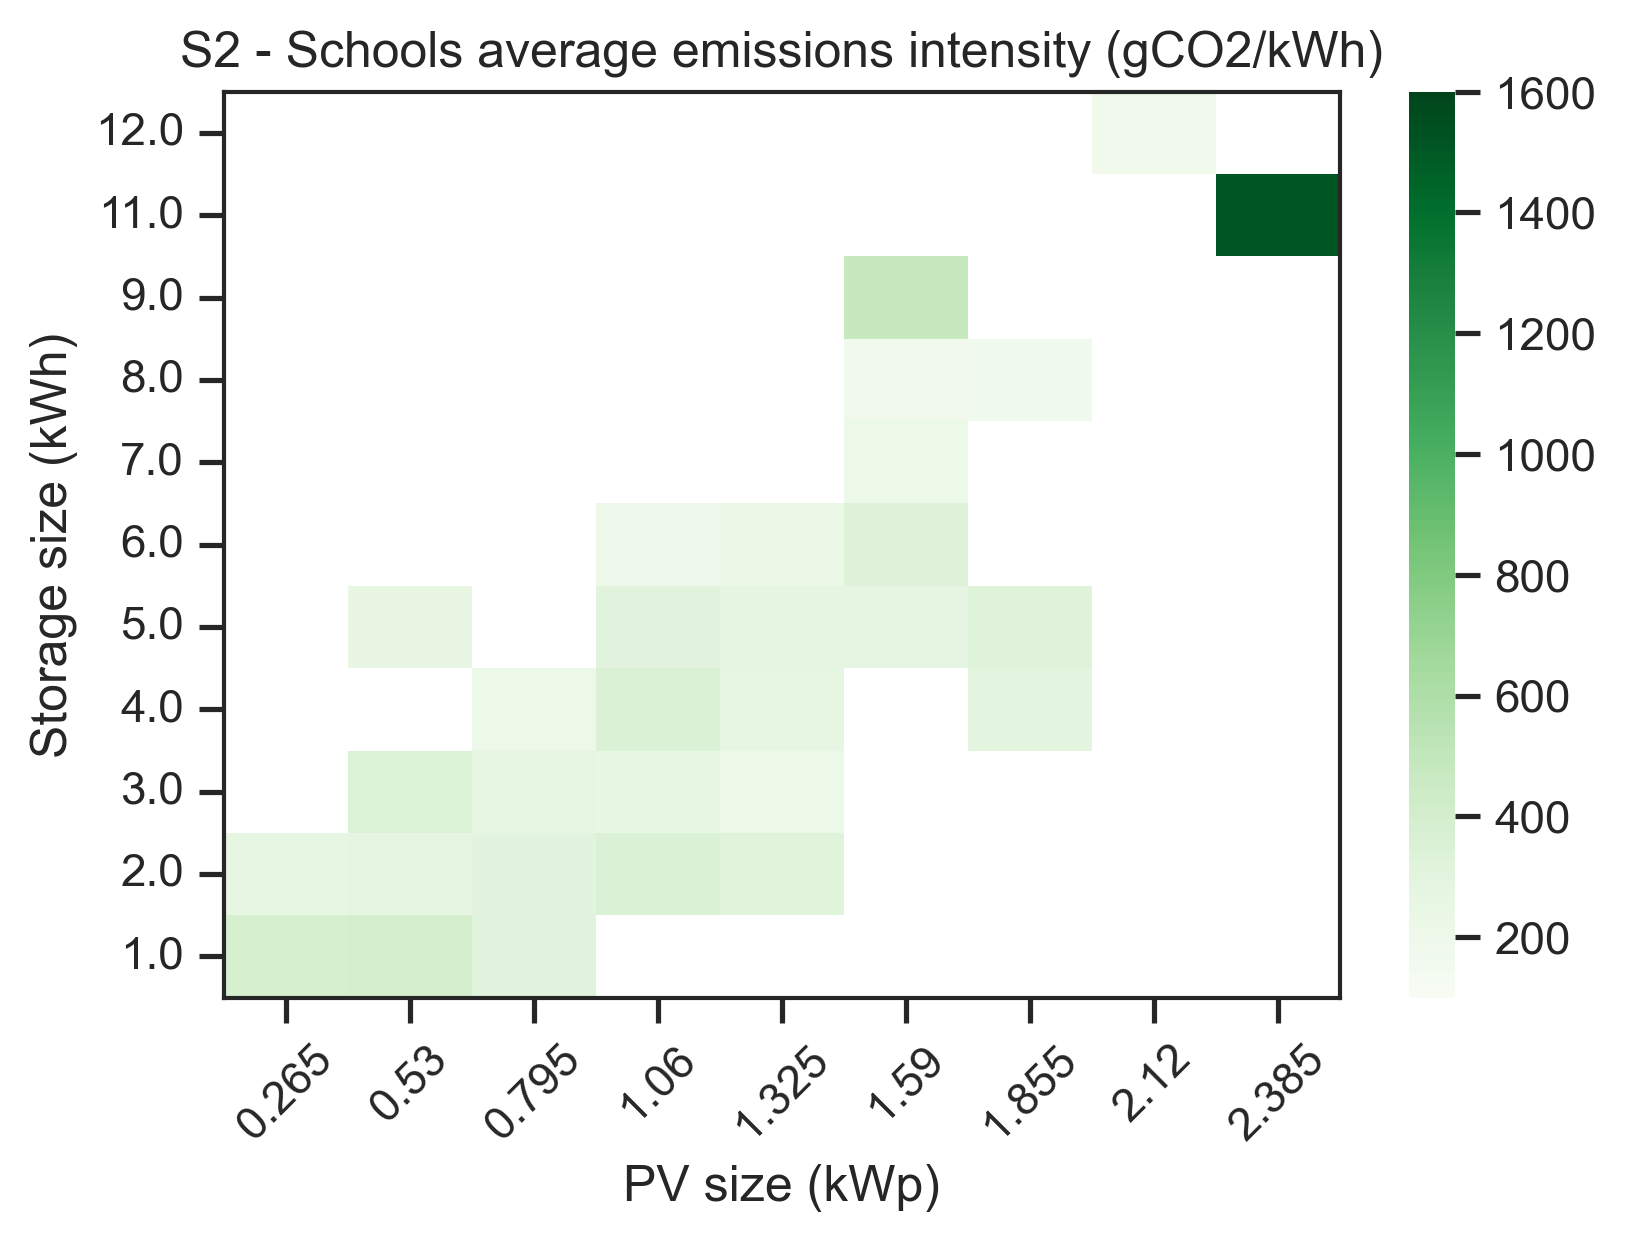

In [16]:
# S2 SCHOOL SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(emi_schools_s2_hp, vmin=100, vmax=1600, cmap="Greens")
ax.invert_yaxis()
ax.set_title("S2 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [17]:
# SCENARIO 3 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s3 = pd.read_csv("Optim_res_unmet_0.05_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s3 = s3[s3.Institution != 'Clinic']

# to check there are 148 schools
schools_s3["Site_name"].count()  # returns 148

148

In [18]:
schools_s3["Emissions_intensity"].describe().round(2)  
# to know emi values (all schools)

count    148.00
mean     262.17
std       98.93
min      140.84
25%      200.92
50%      239.85
75%      284.75
max      815.83
Name: Emissions_intensity, dtype: float64

In [19]:
# Emissions intensity
# Groups schools by Initial storage and PV size and calculates average emi in that bin
emi_schools_s3 = schools_s3.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_schools_s3 = emi_schools_s3.to_frame()
emi_schools_s3.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
1.0                  0.265                         324.93
                     0.530                         266.84
                     0.795                         341.04
                     1.060                         264.71
2.0                  0.265                         243.44
                     0.530                         247.27
                     0.795                         264.33
                     1.060                         264.35
3.0                  0.530                         176.15
                     0.795                         215.86
                     1.060                         227.25
                     1.325                         244.18
4.0                  0.795                         261.74
                     1.060                         202.07
                     1.325                         180.89
5.0                  1.060                         329.06
                     1.325                         282.64
6.0                  1.325                         186.87
                     1.590                         163.65
8.0                  1.325                         437.46
9.0                  2.120                         172.65

In [20]:
# to know schools min and max average emi values (vmin & vmax)
emi_schools_s3["Emissions_intensity"].describe().round(3)
                    # returns: min= 163.654 (vmin), max= 437.455  (vmax)
                    # returns count != than 148 because some sites have same size

count     21.000
mean     252.256
std       66.715
min      163.654
25%      202.067
50%      247.272
75%      266.842
max      437.455
Name: Emissions_intensity, dtype: float64

In [21]:
# Pivot df to be able to do heatmap
emi_schools_s3_hp = emi_schools_s3.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")
emi_schools_s3_hp.round(2) # to show in Jupyter

Initial_PV_size        0.265   0.530   0.795   1.060   1.325   1.590   2.120
Initial_storage_size                                                        
1.0                   324.93  266.84  341.04  264.71     NaN     NaN     NaN
2.0                   243.44  247.27  264.33  264.35     NaN     NaN     NaN
3.0                      NaN  176.15  215.86  227.25  244.18     NaN     NaN
4.0                      NaN     NaN  261.74  202.07  180.89     NaN     NaN
5.0                      NaN     NaN     NaN  329.06  282.64     NaN     NaN
6.0                      NaN     NaN     NaN     NaN  186.87  163.65     NaN
8.0                      NaN     NaN     NaN     NaN  437.46     NaN     NaN
9.0                      NaN     NaN     NaN     NaN     NaN     NaN  172.65

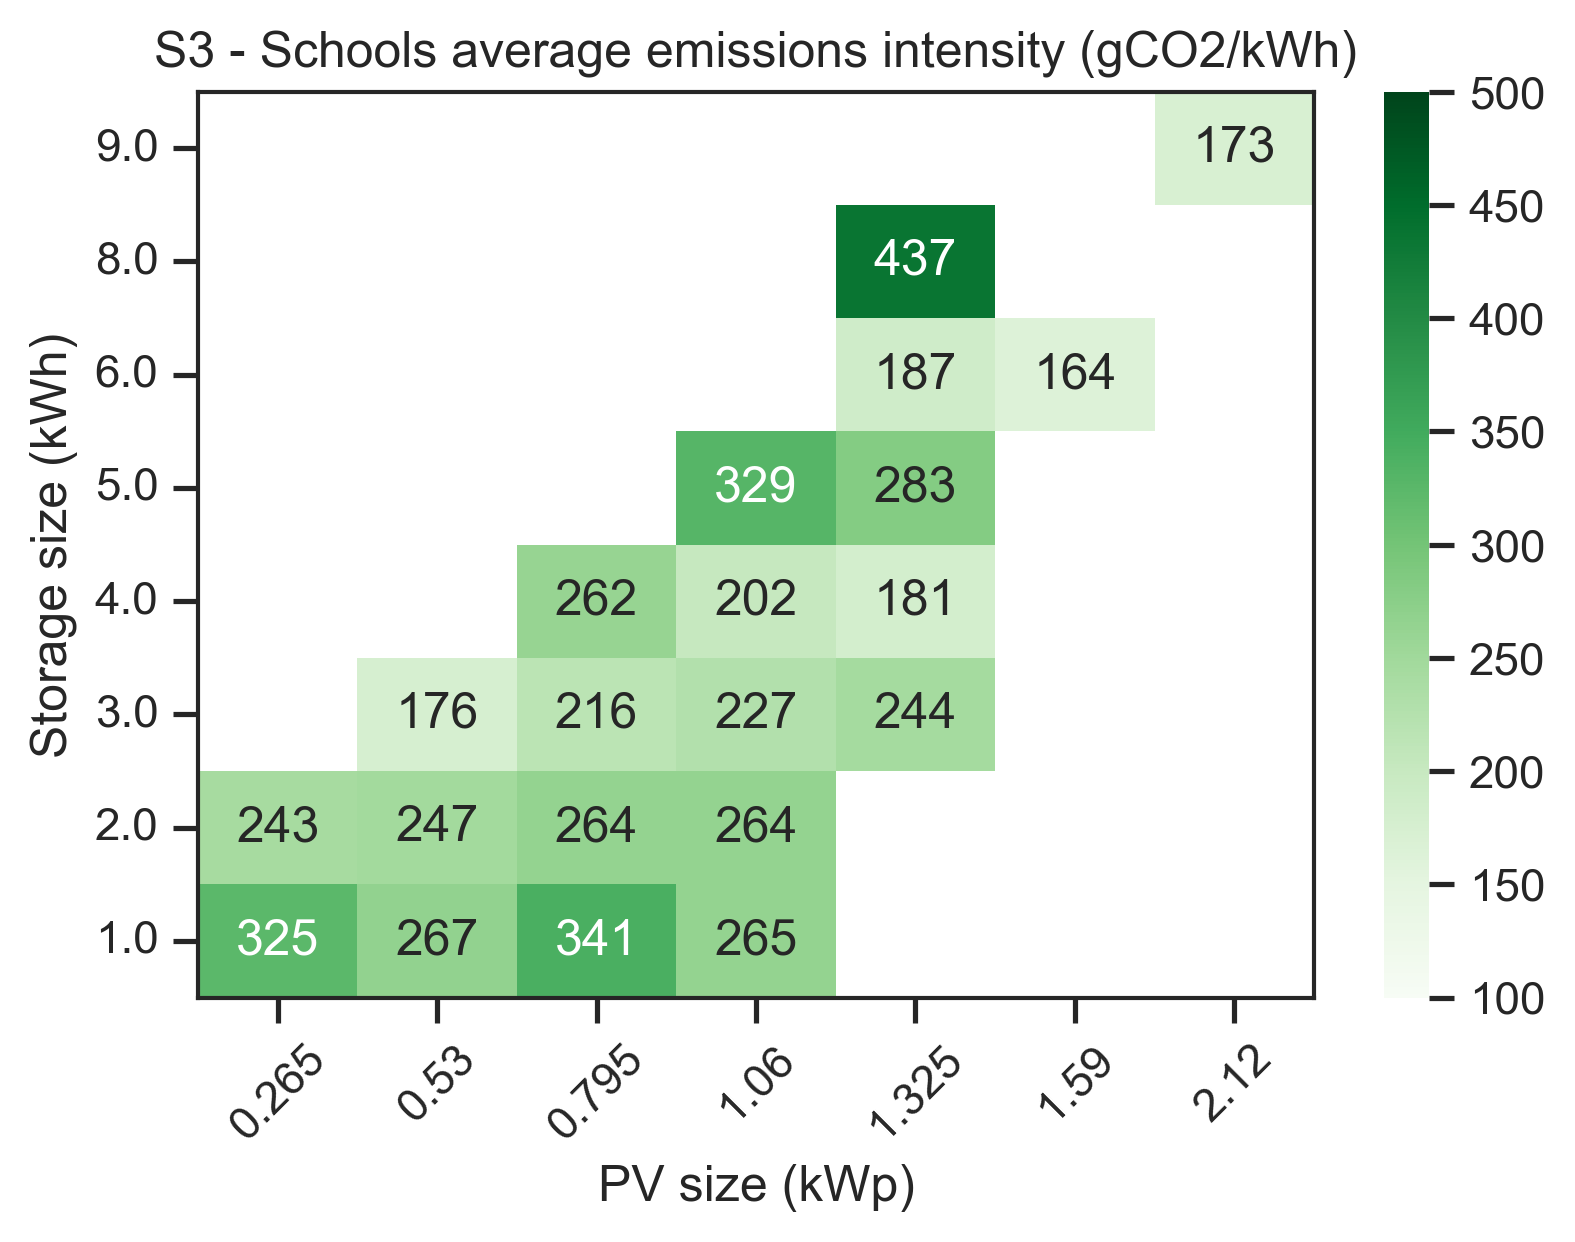

In [22]:
# S3 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(emi_schools_s3_hp, vmin=100, vmax=500, cmap="Greens", annot=True, fmt=".0f")
ax.invert_yaxis()
ax.set_title("S3 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

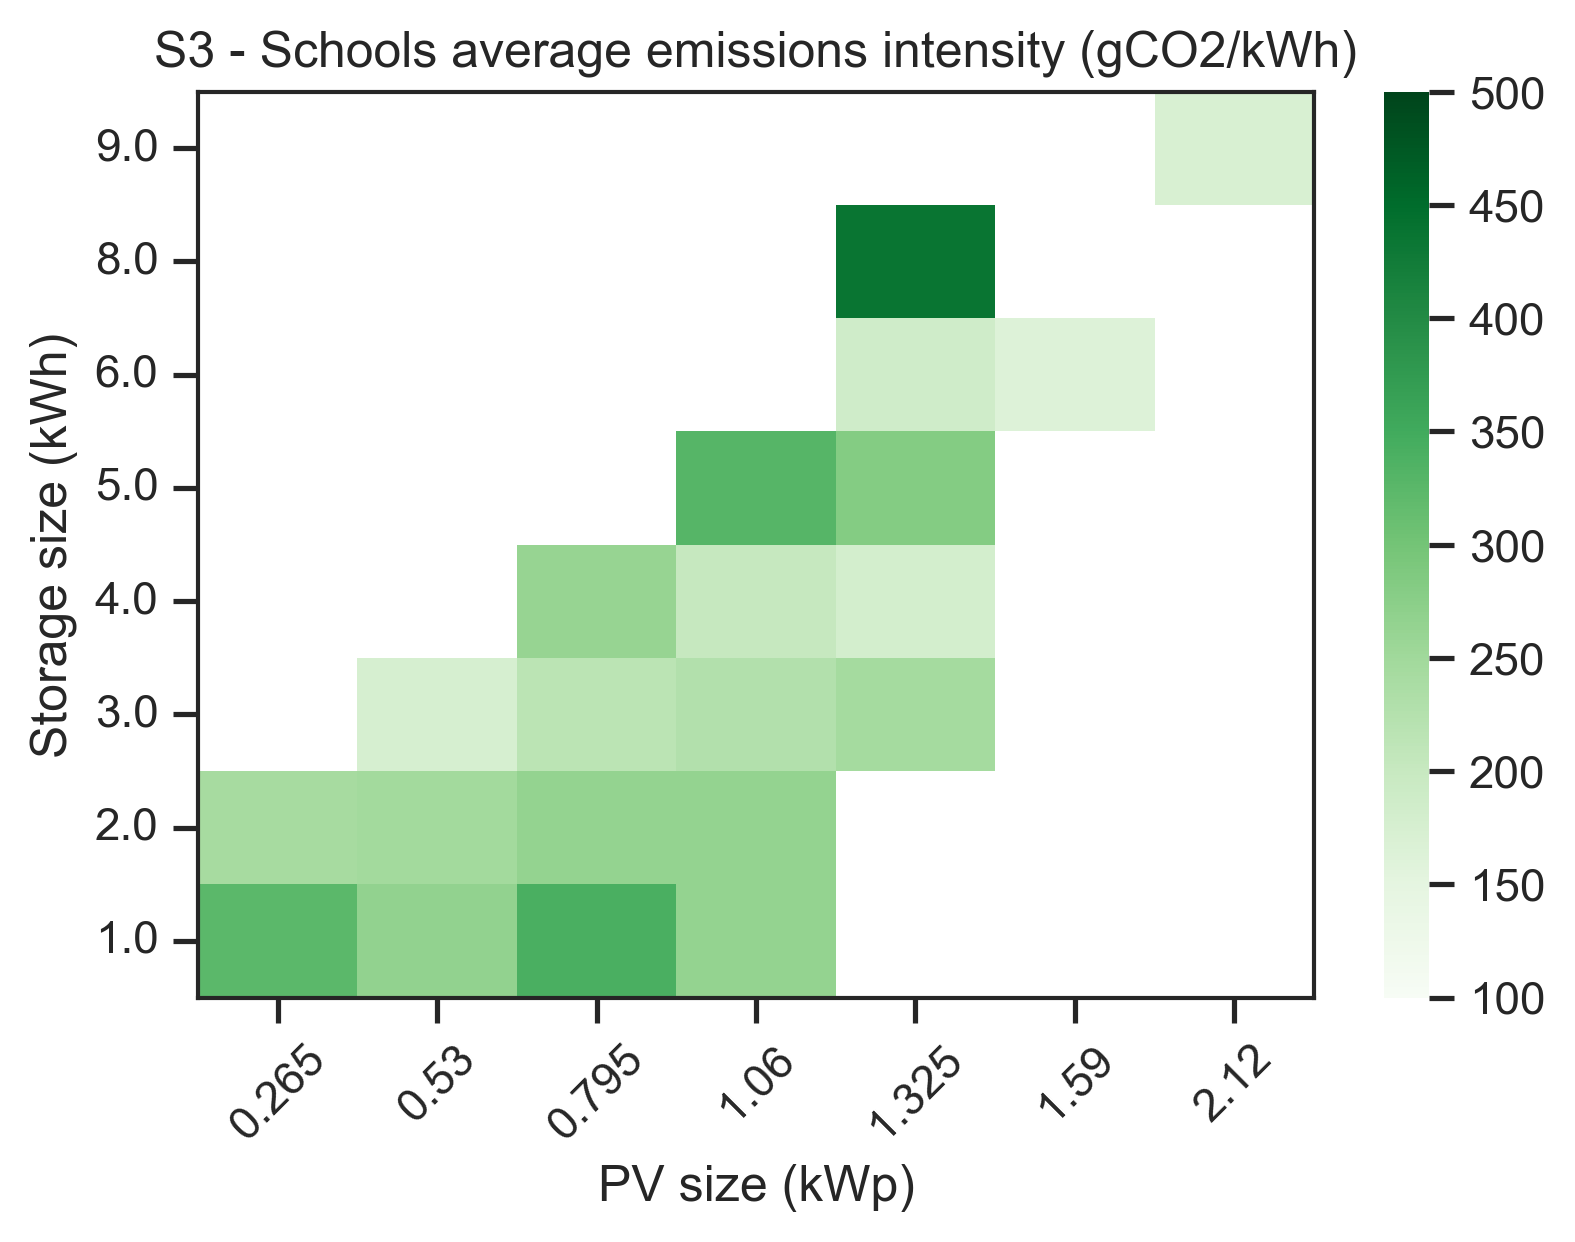

In [23]:
# S3 SCHOOL SIZES PLOT (Plotting data as it is - without annotations))
ax = sns.heatmap(emi_schools_s3_hp, vmin=100, vmax=500, cmap="Greens")
ax.invert_yaxis()
ax.set_title("S3 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [24]:
# SCENARIO 4 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s4 = pd.read_csv("Optim_res_unmet_0.1_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s4 = s4[s4.Institution != 'Clinic']

# to check there are 148 schools
schools_s4["Site_name"].count()  # returns 148

148

In [25]:
schools_s4["Emissions_intensity"].describe().round(2)  
# to know emi values (all schools)

count    148.00
mean     246.41
std       90.75
min      132.02
25%      187.09
50%      222.21
75%      271.67
max      749.67
Name: Emissions_intensity, dtype: float64

In [26]:
# Emissions intensity
# Groups schools by Initial storage and PV size and calculates average emi in that bin
emi_schools_s4 = schools_s4.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_schools_s4 = emi_schools_s4.to_frame()
emi_schools_s4.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
1.0                  0.265                         298.71
                     0.530                         270.54
                     0.795                         219.62
2.0                  0.265                         249.21
                     0.530                         223.03
                     0.795                         239.33
                     1.060                         205.99
3.0                  0.530                         171.46
                     0.795                         198.50
                     1.060                         183.41
4.0                  0.795                         145.65
                     1.060                         224.04
                     1.325                         147.34
5.0                  1.060                         166.84
                     1.325                         156.35
6.0                  1.325                         141.54
7.0                  1.325                         440.79
8.0                  1.855                         162.47

In [27]:
# to know schools min and max average emi values (vmin & vmax)
emi_schools_s4["Emissions_intensity"].describe().round(3)
                    # returns: min= 141.542 (vmin), max= 440.792 (vmax)
                    # returns count != than 148 because some sites have same size

count     18.000
mean     213.600
std       72.566
min      141.542
25%      163.562
50%      202.243
75%      235.509
max      440.792
Name: Emissions_intensity, dtype: float64

In [28]:
# Pivot df to be able to do heatmap
emi_schools_s4_hp = emi_schools_s4.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")
emi_schools_s4_hp.round(2) # to show in Jupyter

Initial_PV_size        0.265   0.530   0.795   1.060   1.325   1.855
Initial_storage_size                                                
1.0                   298.71  270.54  219.62     NaN     NaN     NaN
2.0                   249.21  223.03  239.33  205.99     NaN     NaN
3.0                      NaN  171.46  198.50  183.41     NaN     NaN
4.0                      NaN     NaN  145.65  224.04  147.34     NaN
5.0                      NaN     NaN     NaN  166.84  156.35     NaN
6.0                      NaN     NaN     NaN     NaN  141.54     NaN
7.0                      NaN     NaN     NaN     NaN  440.79     NaN
8.0                      NaN     NaN     NaN     NaN     NaN  162.47

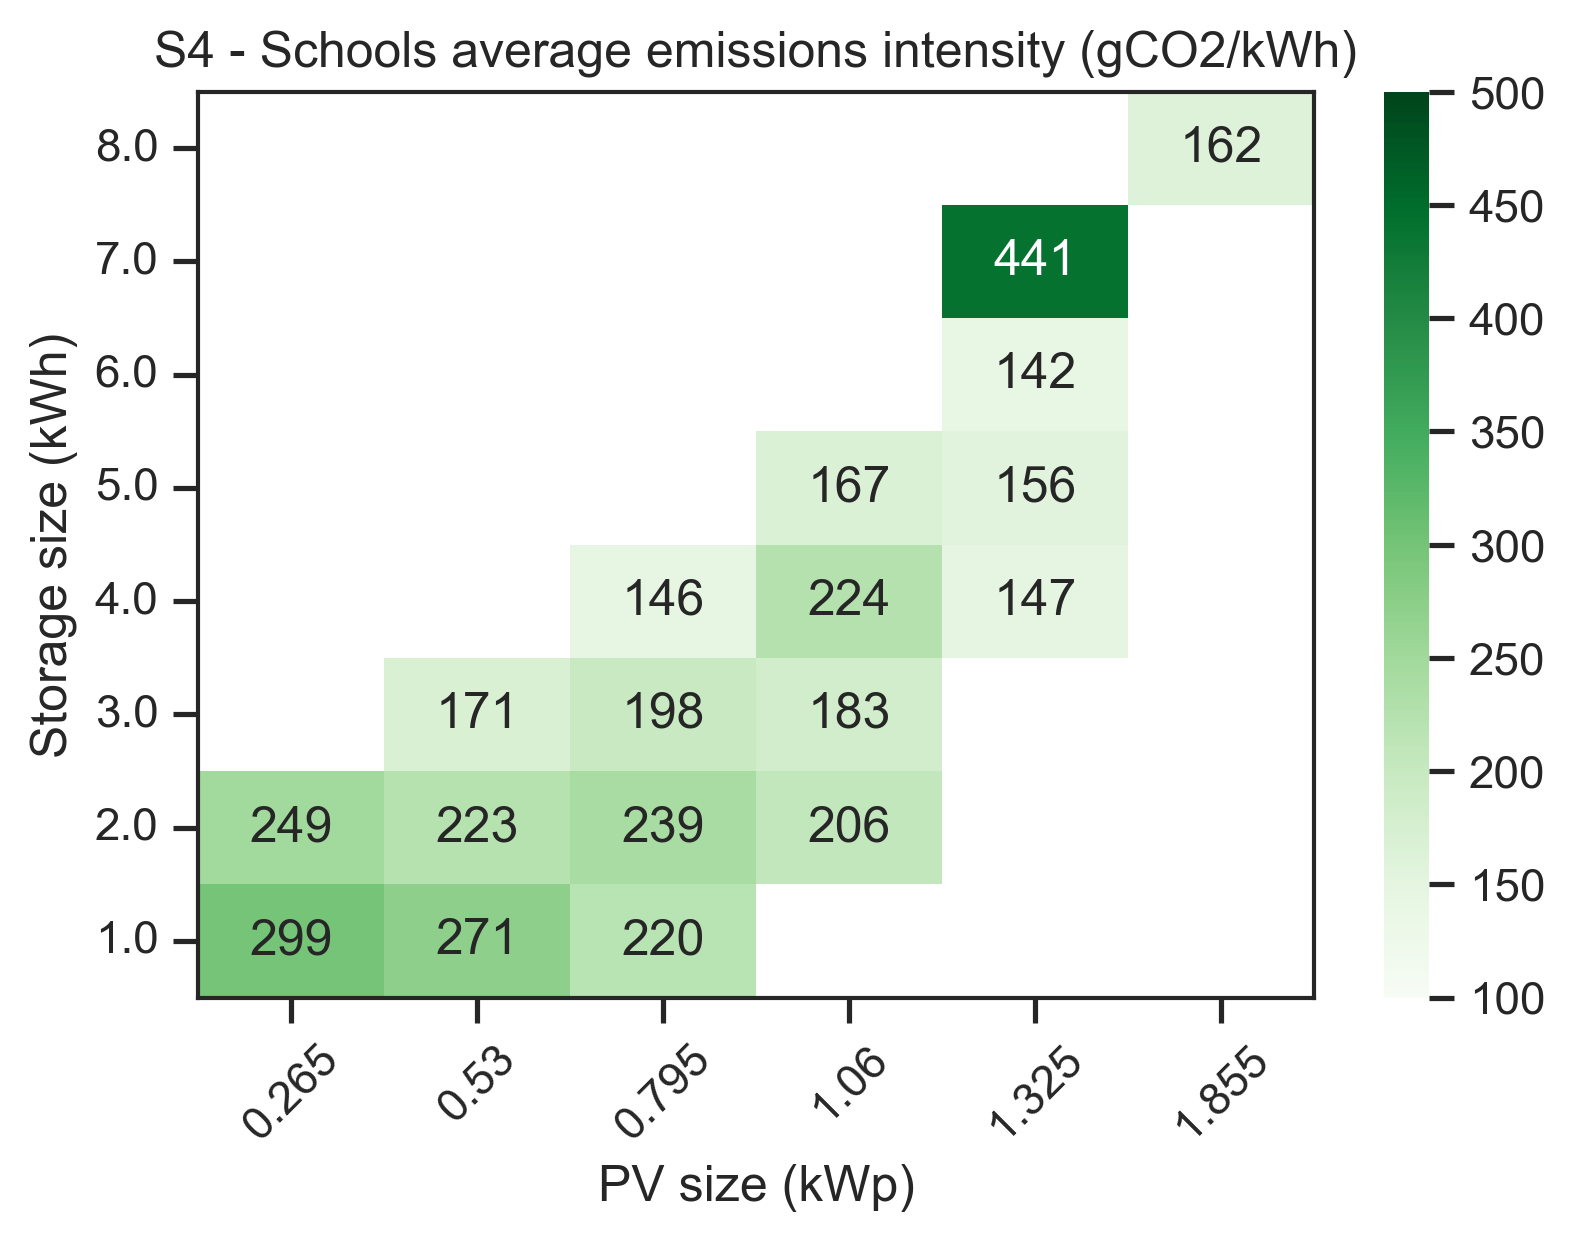

In [31]:
# S4 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(emi_schools_s4_hp, vmin=100, vmax=500, cmap="Greens", annot=True, fmt=".0f") 
ax.invert_yaxis()
ax.set_title("S4 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

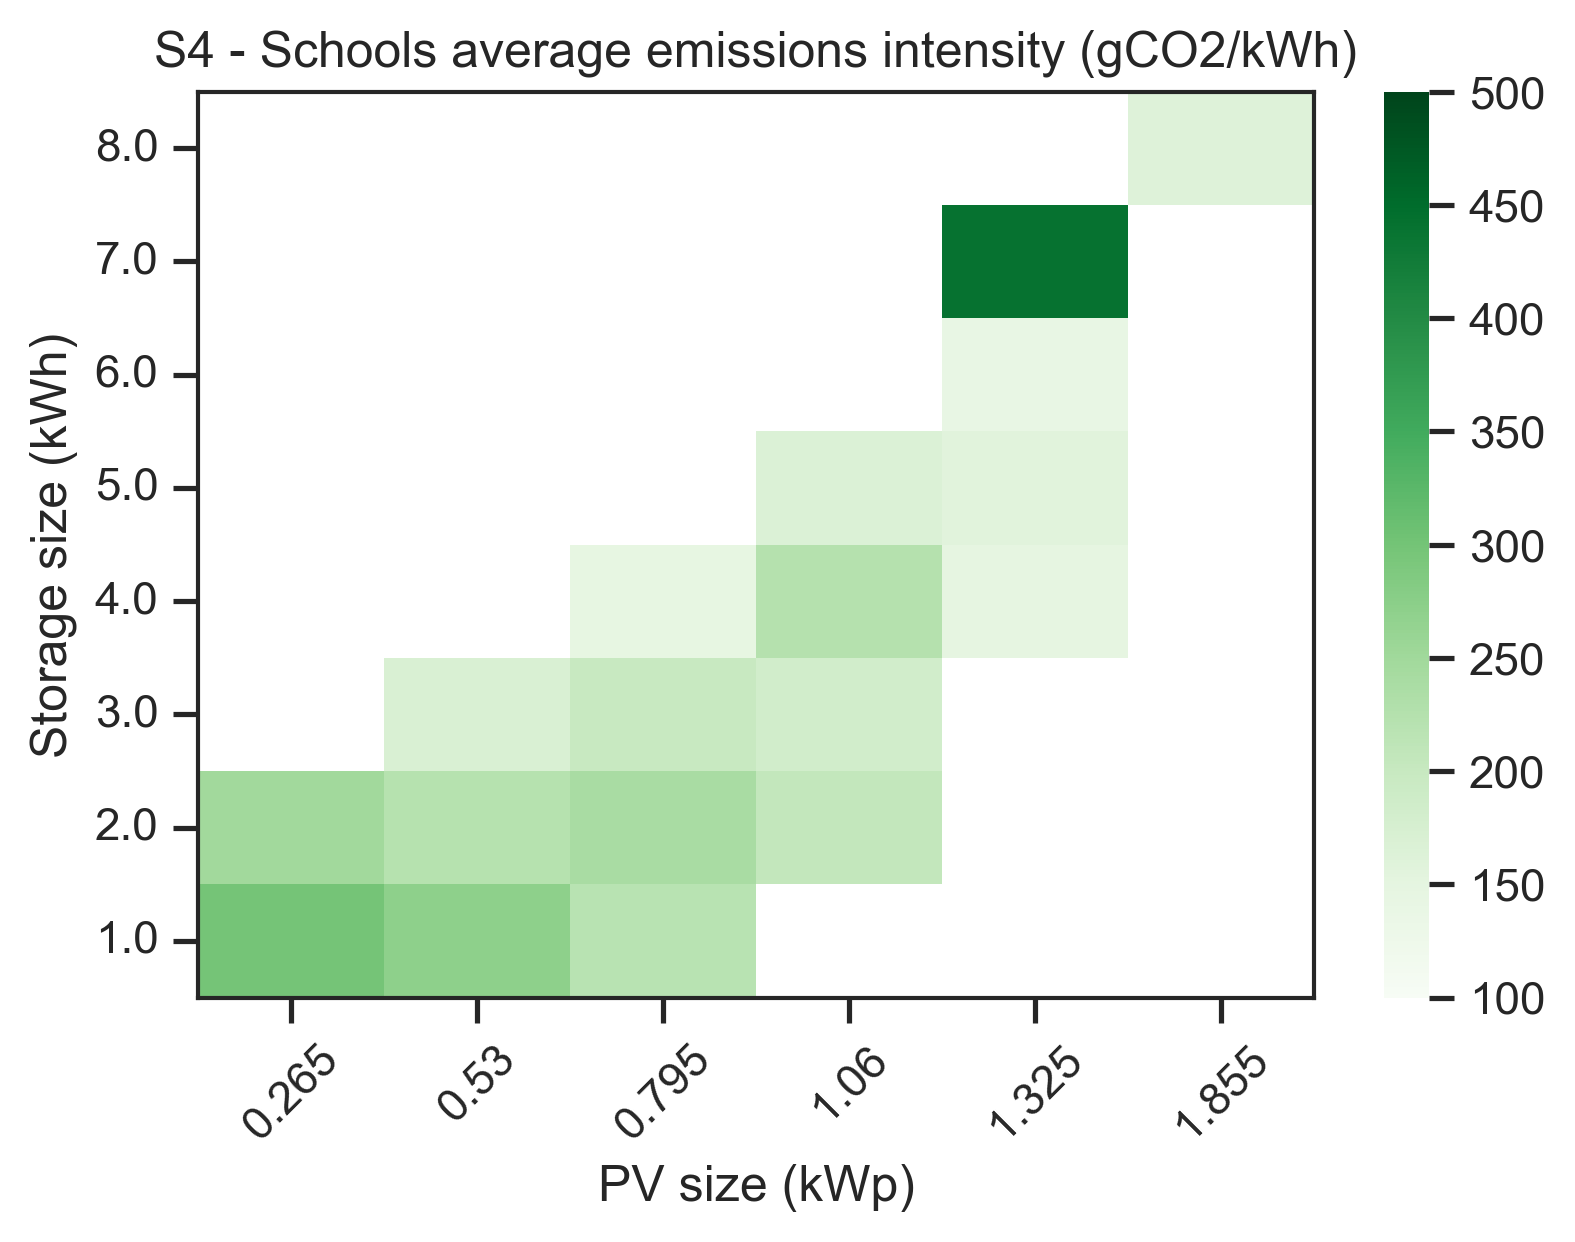

In [30]:
# S4 SCHOOL SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(emi_schools_s4_hp, vmin=100, vmax=500, cmap="Greens") 
ax.invert_yaxis()
ax.set_title("S4 - Schools average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

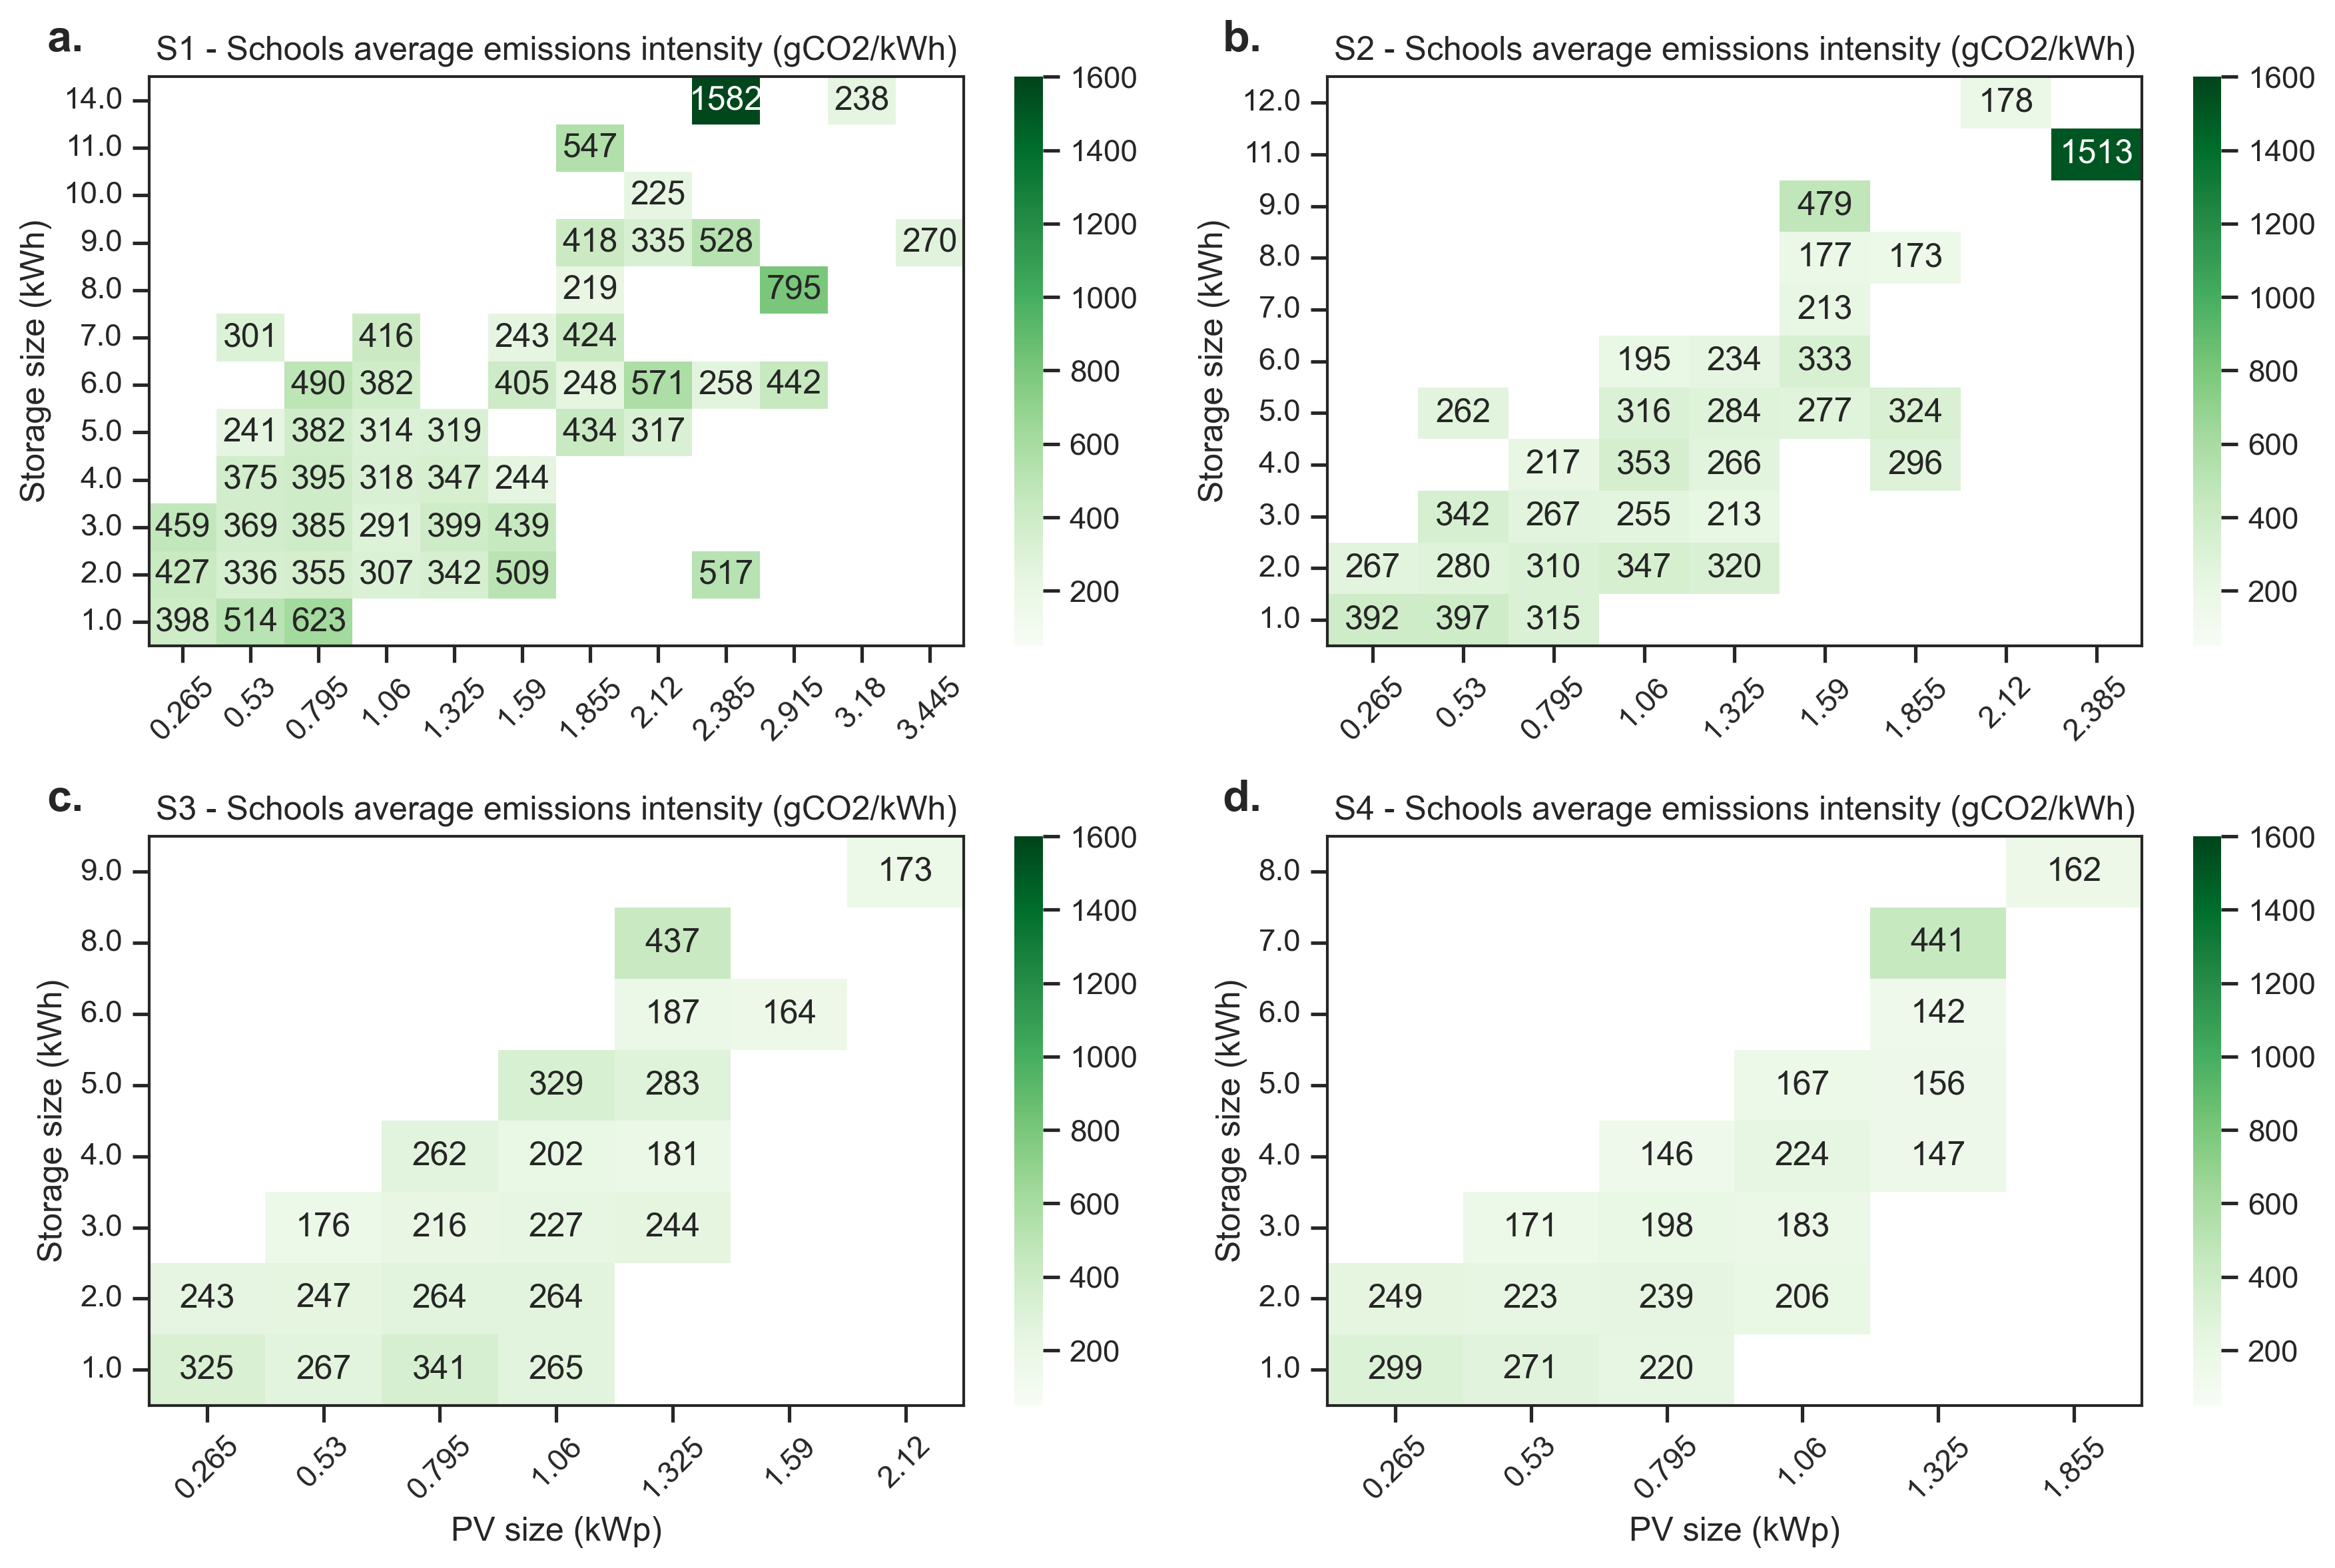

In [32]:
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., emi_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_schools_s1_hp, vmin=50, vmax=1600, cmap="Greens", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_schools_s2_hp, vmin=50, vmax=1600, cmap="Greens", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_schools_s3_hp, vmin=50, vmax=1600, cmap="Greens", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_schools_s4_hp, vmin=50, vmax=1600, cmap="Greens", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

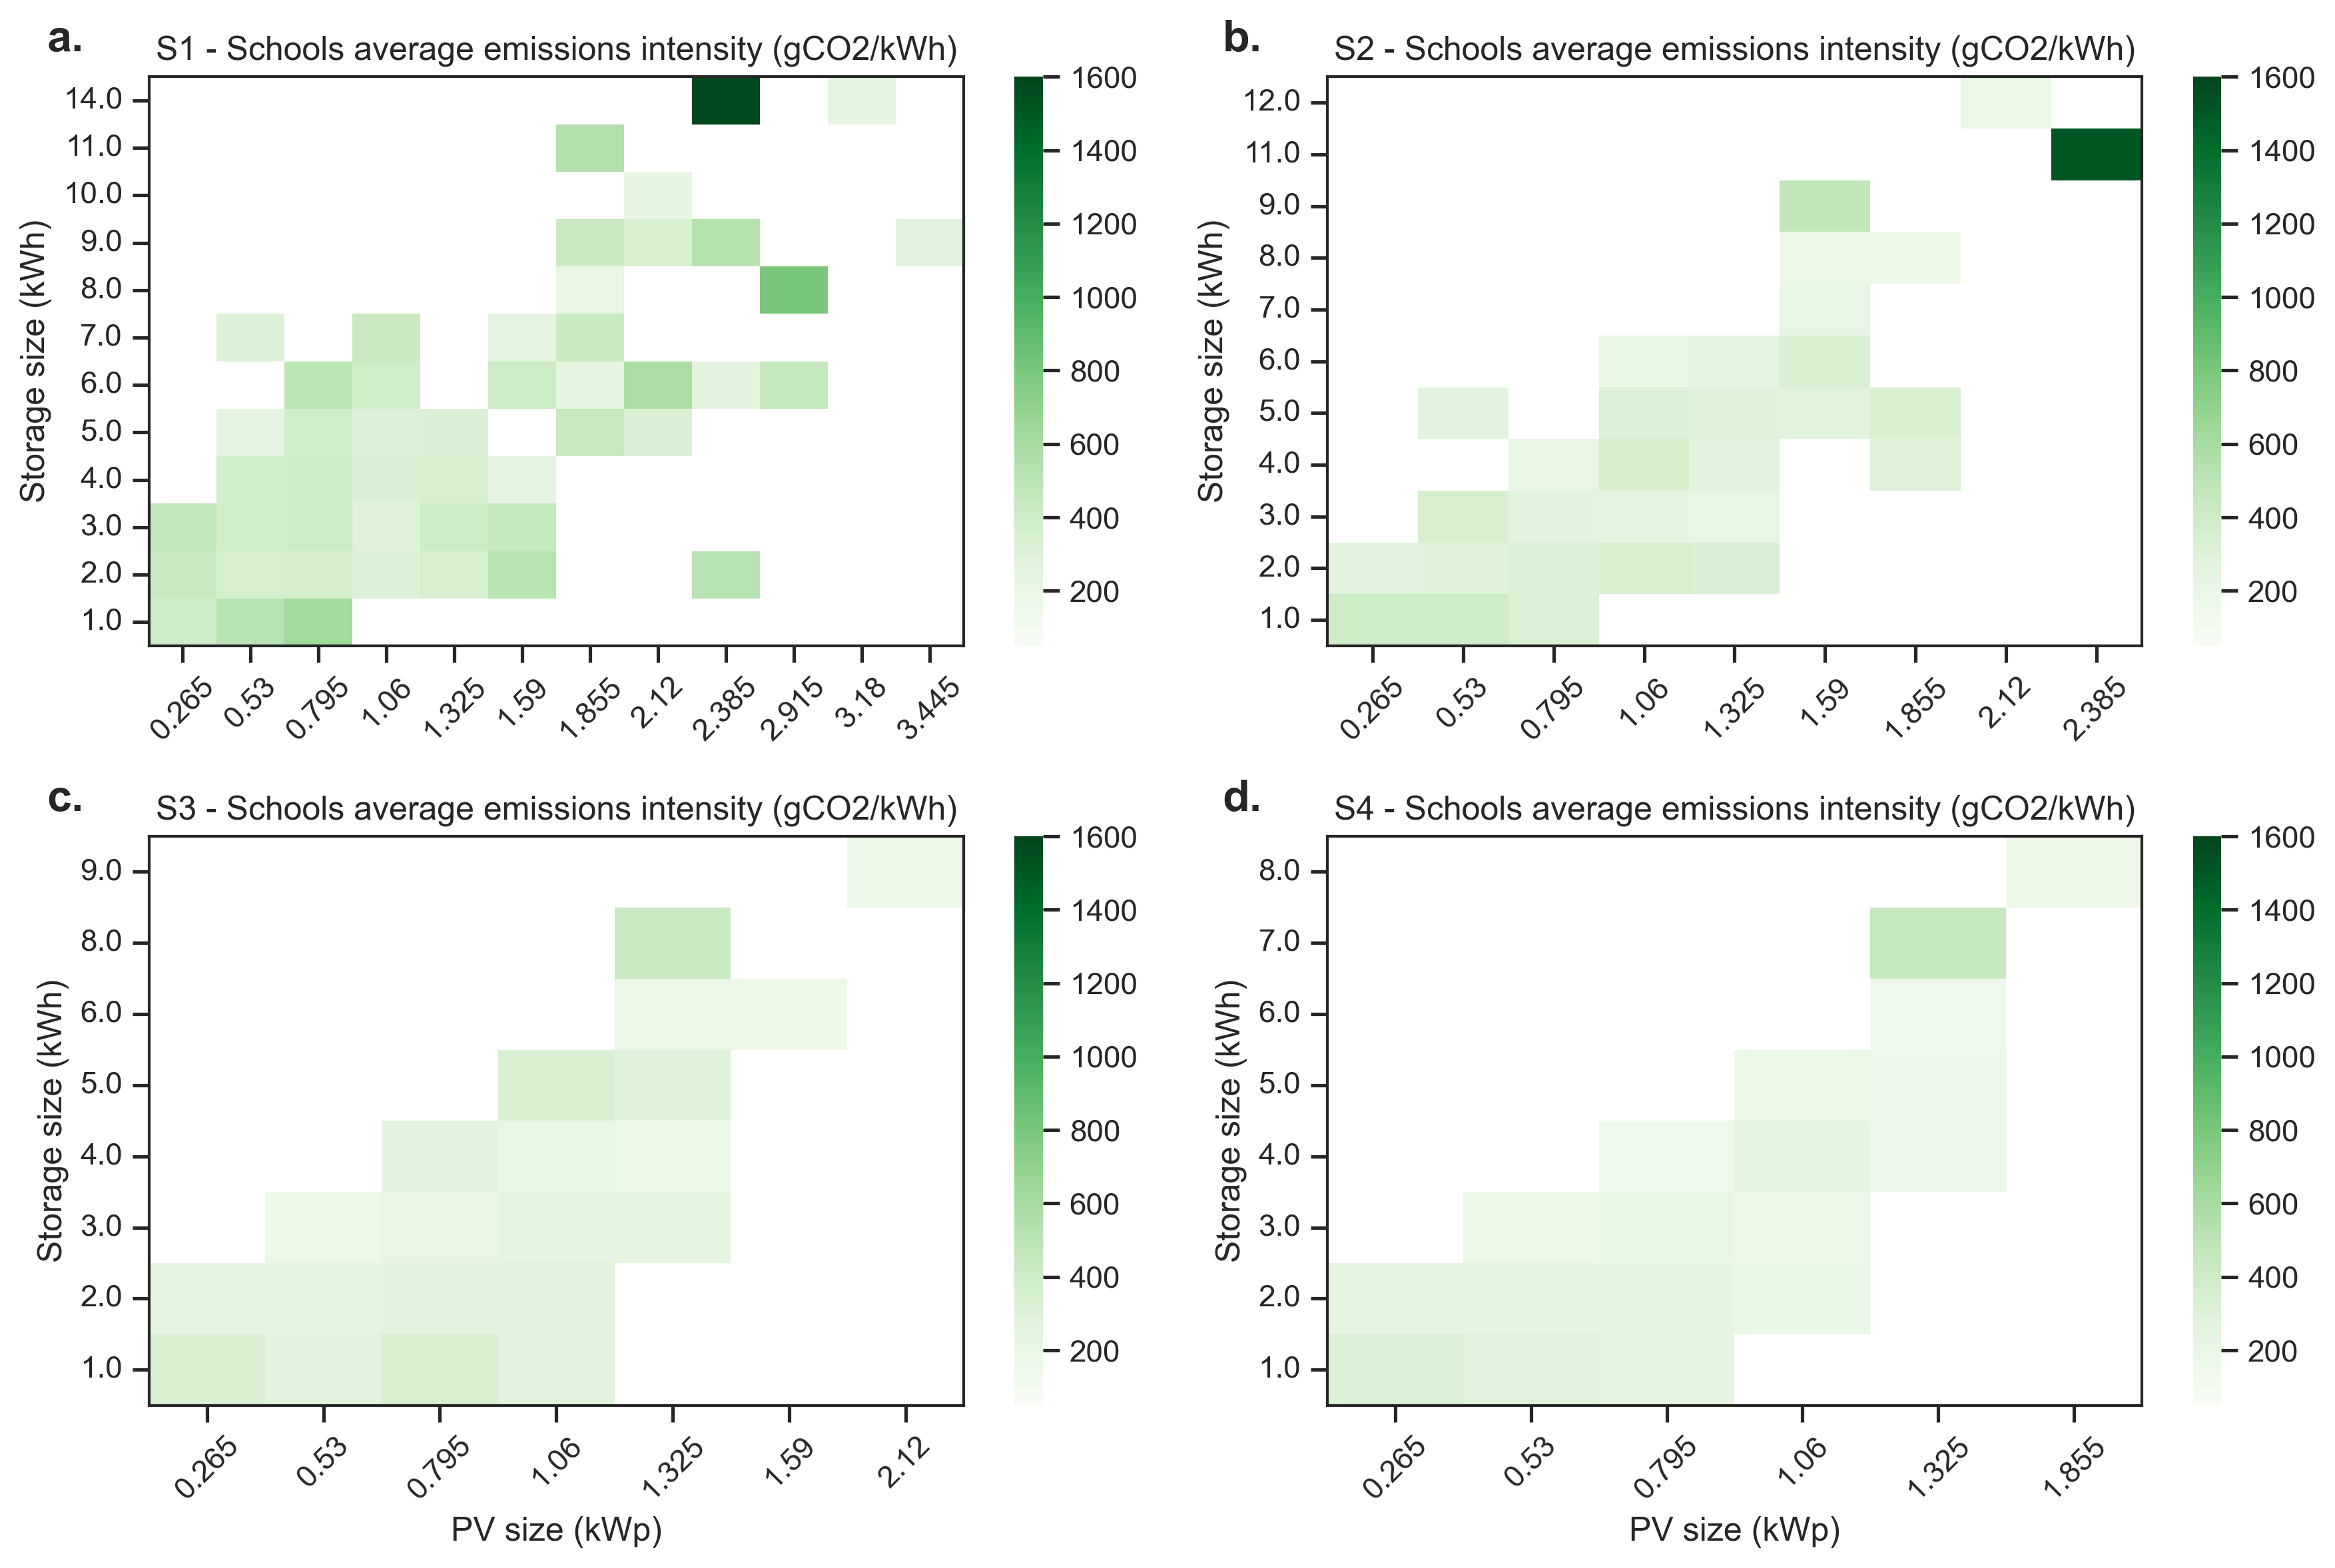

In [33]:
# SAME AS ABOVE BUT WITHOUT ANNOTATIONS
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., emi_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_schools_s1_hp, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_schools_s2_hp, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_schools_s3_hp, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_schools_s4_hp, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [34]:
# CHANGE DF TO EXTEND X AND Y AXIS AND REINDEX DF TO COMPARE PLOTS
# S1
emi_schools_s1_hp_ext = emi_schools_s1_hp.reindex(range(1,15), axis=0) # fill_value=0
emi_schools_s1_hp_ext = emi_schools_s1_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

# S2
emi_schools_s2_hp_ext = emi_schools_s2_hp.reindex(range(1,15), axis=0) # fill_value=0
emi_schools_s2_hp_ext = emi_schools_s2_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

# S3
emi_schools_s3_hp_ext = emi_schools_s3_hp.reindex(range(1,15), axis=0) # fill_value=0
emi_schools_s3_hp_ext = emi_schools_s3_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

# S4
emi_schools_s4_hp_ext = emi_schools_s4_hp.reindex(range(1,15), axis=0) # fill_value=0
emi_schools_s4_hp_ext = emi_schools_s4_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)

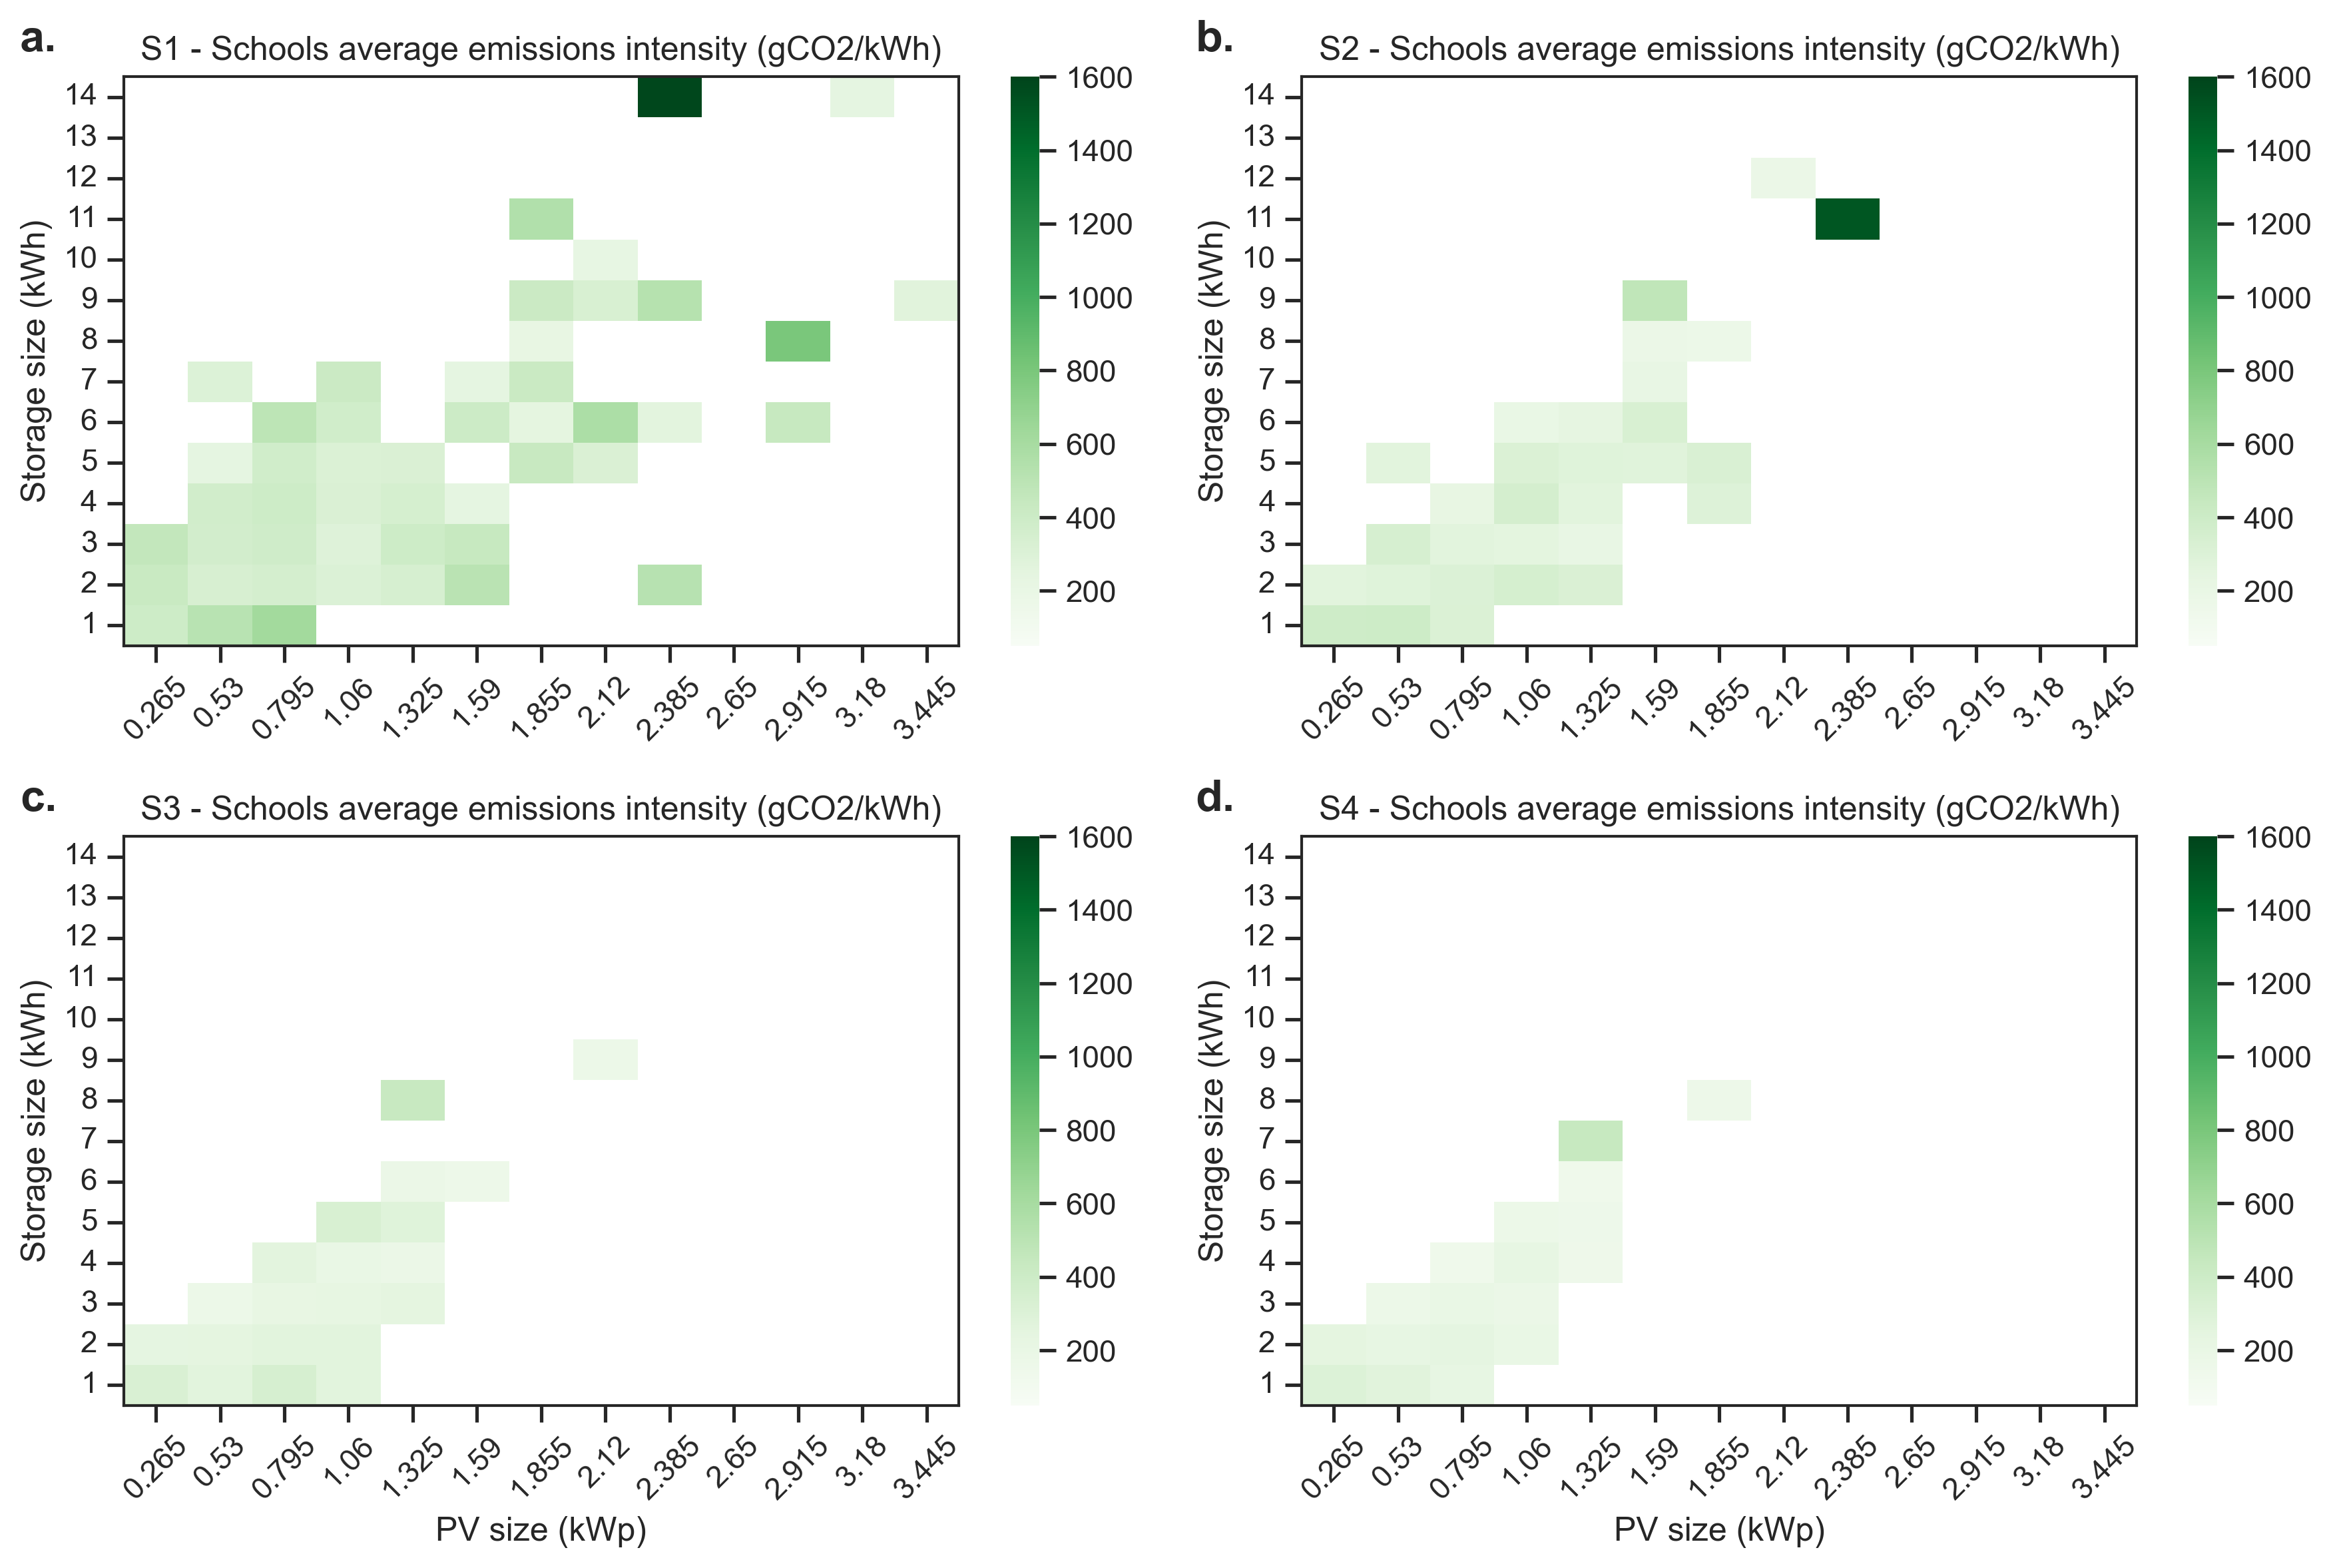

In [35]:
# PLOT WITH SAME AXIS ACROSS ALL SCENARIOS variables end now with "_ext"
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with same axis and same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., emi_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_schools_s1_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_schools_s2_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_schools_s3_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_schools_s4_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

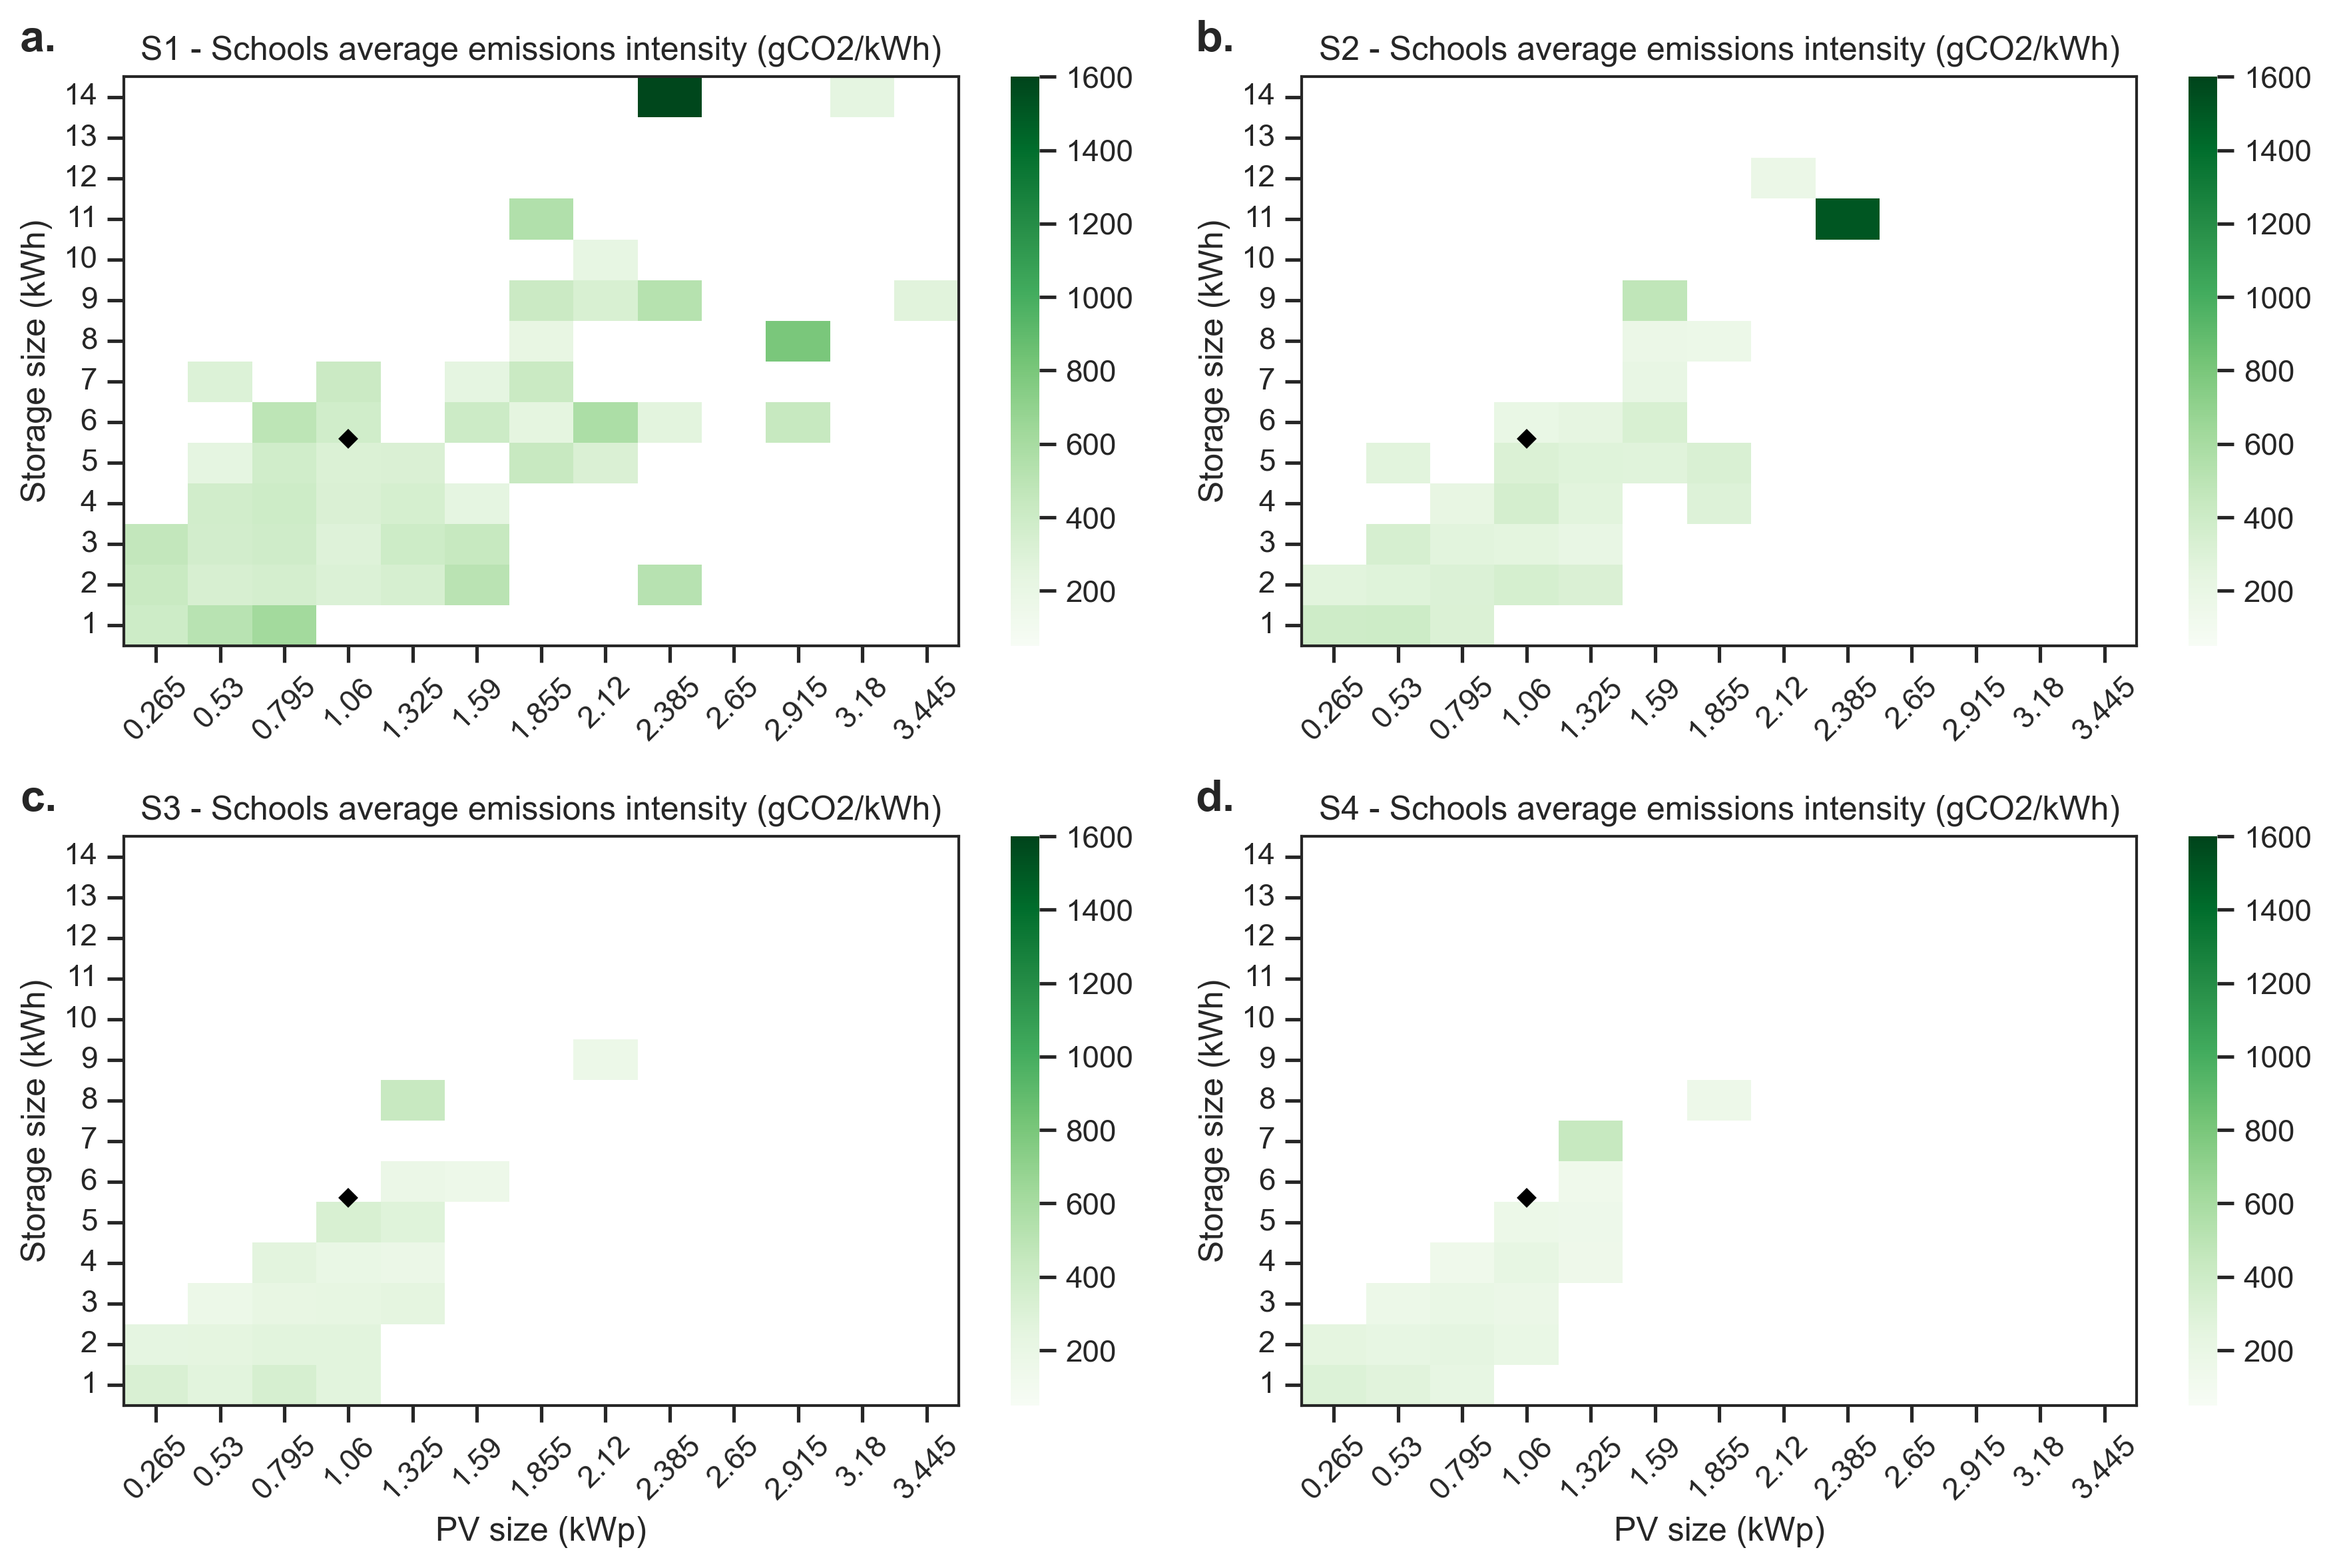

In [36]:
# SAME AS ABOVE BUT ADDING IMPALA AS DATA POINT
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with same axis and same colour scale)
# To make subplots with same axis use variables ending with '_ext' (e.g., emi_schools_s1_hp_ext)
# comment Impala marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_schools_s1_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_schools_s2_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_schools_s3_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_schools_s4_hp_ext, vmin=50, vmax=1600, cmap="Greens",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [ ]:
# Last two plots are the final version used so far. So if I need to rerun this plot, don't
# do all the plots again. Just do the last two plots. 
# I added Impala systems as a data point/marker but this only indicates the system size. 
# I was originally thinking of colouring the diamond marker with the average emissions 
# intensity of clinics in S0 but JN mentioned it didn't make sense to do this bc they are 
# a spread. Instead show (boxplot?) of emission of S0 per institution type.